<a href="https://colab.research.google.com/github/JoDeMiro/Statistics/blob/main/Python_Statistics_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Python import
%%capture
!pip install imgaug==0.2.5
!pip install scipy==1.6.2

import math
import numpy as np
import pandas as pd
import scipy as scipy
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Statisztikai hipotézisvizsgálat 

Ebben a részben a statisztikai hipotézisvizsgálat témakörével fogok foglalkozni.

A kurzus/tanulmány során ki fogok térni
- a kombinatorika
- a valószínűség számítás
- a mintavétel
- a statisztiki próbák
témakörére is.

A jegyzetet Dr. Prof. Takács Márta tanárnő - Statisztikai hipotézisvizsgálat című tantárgyához készítettem a 2021/2 félévben.

## Bevezető

### Amit elértem:
Megpróbáltam elsajátítatni a statisztikai vizsgálatok során alkalmazott szóhasználatot, terminológiákat és kifejezéseket,<br>
hogy a továbbiakban jobban megértesem a statisztika tudományterületén és a kutatásokban résztvevők szóhasználatát.

Feltérképeztem és körbejártam a leggyakrabban használt programozási könyvtárakat, és minden próbához írtam<br>
egy rövid példát. Ezek segítettem abban, hogy jobban megértsem a terminilógiát, és begyakoroljam azok használatát.

Némi kitekintést tettem a valószínűség számítás és a különböző statisztikai eloszlások irányába.<br>
Ezen az úton nem haladtam tovább, csak érintettem.

Foglalkoztam a mintavétellel és próbáltam mélyebb betekintést nyerni a valószínűségi változók eloszlásába.

Érintettem a változók méris szintjének témáját a hozzájuk tartozó statisztikai próbák vonatkozásában.

## A tantárgy tartalma:
Eseményalgebra, valószínűségszámítás (ismétlés), Statisztika – alapfogalmak. Korreláció- és
regressziószámítás. Általános döntéselméleti tételek. Statisztikai döntések alapelvei. Becslések,
pontbecslés, intervallumos becslés. Hipotézisvizsgálatok. Nemparaméteres próbák. Szórások
összehasonlítása. Középértékre vonatkozó próbák. Korreláció- és regressziószámítás.

http://aidi.uni-obuda.hu/sites/default/files/OE_AIAMDI_t%C3%A1rgyle%C3%ADr%C3%A1sok_2021.febru%C3%A1r.pdf


<a name="tartalom"></a>

## Tartalom

Bevezetés

> [Mi a hipotézisvizsgálat](#Mi_a_hipotezis_vizsgalat)<br>
> [Az elsőfajú és másodfajú hiba](#Az_elsőfajú_és_másodfajú_hiba)<br>
> [A statisztikai következtetés](#statisztikai_kovetkeztetes)<br>
> A kísérlet<br>
> Mintavétel<br>
> Statisztikai próbák<br>
> u-próba [u-próba](#u-proba)<br>
> t-próba [t-próba](#egymintas-t-proba)<br>
> t-próba [kétmintás t-próba](#ketmintas-t-proba)<br>
> t-próba [páros t-próba](#paros-t-proba)<br>
> z-próba [z-próba](#z-proba)<br>
> f-próba [f-próba](#egymintas-t-proba)<br>
> khi-négyzet-próba [khi-négyzet-próba](#egymintas-t-proba)<br>
> A normális eloszlásról [A normális eloszlásról](#normalis_eloszlas)<br>
> A standard normális eloszlás [A standard normális eloszlás](#standard_normalis_eloszlas)<br>
> A covariancia [A covariancia](#covariancia)<br>
> A korreláció [A korreláció](#korrelacio)<br>
> Hivatkozások [Hivatkozások](#hivatkozasok)<br>
> Felhasznált irodalom [Felhasznált irodalom](#felhasznalt-irodalom)<br>




<a name="Mi_a_hipotezis_vizsgalat"></a>

## Mi a hipotézisvizsgálat?

A hipotézisvizsgálat két állítás körültekintő felépítését foglalja magában: a nullhipotézist és az alternatív hipotézist. De tekinthetünk rá úgy is mint, olyan statisztikai módszer amely segítségével megfigyeléseken és méréseken alapuló következtetéseket tudunk levonni.

A hipotézisvizsgálat egy alapvető eljárás a matematikai statisztikában, amely azt vizsgálja, hogy két egymást kizáró állítás közül melyiket fogadjuk el, a megfigyeléseink alapján.
<br>
<br>
hipotézis állítás - kísérlet - megfigyelés - következtetés
<br>
<br>
**Sokkféle hipotézist fogalmazhatok meg:**

Például ha van egy üvegpoharam és feltételezem, hogy törhetetlen.

Annak érdekében, hogy ezt eldöntsem el kell végeznem egy **kísérletet**.<br>
például leejtem a porahat a földre és azt tapasztalom, hogy a pohár összetörik.<br>
Ebben az esetben el kell vetnem a felvetésemet, hogy a pohár törhetetlen.


> *Tehát a hipotézisvizsgálat egy összetett vizsgálati módszer, folyamat, módszerten, megközelítés mód, amely abból indul ki, hogy a megfigyeléseink alapján levonhatunk valamilyen következttést egy adott jelenségre nézve.*

> *Ha jól állítjuk fel a hipotézisünket, akkor a kísérlet(sorozat) elvégzésével el tudjuk dönteni, hogy melyik feltételezésünk volt igaz.*

> ***Tulajdonképpen azért végzünk kísérletet, méréseket, megfigyeléseket, mert nem tudjuk, hogy két lehetséges feltételezés közül melyik igaz.***

<br>

A **nullhipotézis** általában azt mondja ki, hogy a két megfigyelt jelenség között nincs kapcsolat, nincs összefüggés.

Az **alternatív hipotézst** a nullhipotézis ellenében fogalmazzuk meg, tehát ha az alapfelvetésünk az, hogy a két jelenség között nincs összefüggés, akkor az alternetív hipotézisünk az, hogy van.

A **nullhipotézist** és az **alternatív hipotézst** mindig egymást kizáró módon kell felállítani, vagyis hogyha az egyik igaz, akkor a másik biztos, hogy hamis.

Miért akarnék tesztelni egy hipotézist csak azért, hogy hamisnak találjam? Miért nem csak egy alternatív hipotézist tesztelünk? A rövid válasz az, hogy a **tudományos módszer** része. A tudomány inkább matematikai statisztika segítségével határozza meg annak valószínűségét, hogy egy állítás igaz vagy hamis.

> *Visszatérve a pohár kisérlethez.*<br>
> Nem lehetek biztos benne, hogy pohár nem azért tört-e össze mert éppen csak össze akart törni, s nem pedig azért mert összeütközött a betonpadló érdes felületével.

> Ha tényleg tudni akarom, hogy az ütközés hatására törnek-e a poharak, akkor a fenti kísérletet megismétlem, sőt többször is megismétlem

> Tegyük föl, hogy mind a 10 pohár összetört. Ez már elég erős bízonyíték arra, hogy kapcsolat van az ütközés és a pohár törés között.

> **De, hogy mennyire 'erős bizonyíték' annak eldöntésére szolgált a statisztikai hipotézis vizsgálat!**

<br>

A statisztikai hipotézis vizsgálat tulajdonképpen a következő lépésekre bontható fel - *ezt csak magamnak emlékeztető, ezt sehol nem írják*

> hipotézis állítás - kísérlet - megfigyelés - következtetés

<br>

**De miért van szükség statisztikai hipotézis vizsgálatra?**

A látszólag cinikus kérdés mögött, sokkal komolyabb kérdésfelvetés van.
<br>
> Az korábban említett poharakkal végzett kísérletsorozat alapján,<br>
> mennyire 'erős' bizonyítékunk van arra, hogy a pohár a betonnal való ütközés<br>
> hatására tört össze? (a kérdést egyelőre nyitva hagyom)

> Tegyük fel, hogy egy pénzérmét feldobunk egymás után 10-szer és azt<br>
> tapasztaljuk, hogy mind a 10 esetben fej.

> Mennyire lehetünk biztosak abban, hogy az émre szabályos és nem 'cinkelt'?

<br>

**Ilyen és ehhez hasonló kérdéseken és péládkon keresztül szeretném bemutatni a statisztikai hipotézis vizsgálatok jelentőségét, használatát, hogy mikor, milyen esetekben milyen típusú statisztikai hipotézis vizsgálatokkal tudunk alkalmazni.**

<br>

Számos egyéb deffinició létezik

> `  A jelenségek valószínűségi szinten való megfigyelhető vizsgálata a matematikai statisztika módszereivel történik. Az objektív megfigyelések alapján a vizsgálatot végző egyén az adatokat elemezve összefüggé­seket keres, és összevetéseket készít a tapasztalati adatok és az elméleti következtetések alapján.`


A nullhipotézis vizsgálatára két megközelítés létezik, Ronald Fischer, illetve Jerzy Neyman és Egon Pearson nevéhez fűződően.

> `Fischer megközelítése azon a feltételezésen alapul, hogy nullhipotézis igaz, és azt vizsgálja, ebben az esetben mekkora valószínűséggel kaphatjuk a megfigyelt adatokat. Amennyiben az adatok bekövetkezésének valószínűsége szignifikánsan alacsony, a nullhipotézis elutasítható. Neyman és Pearson megközelítése ezzel szemben a nullhipotézisnek az alternatív hipotézissel való szembeállításán alapul, majd a rendelkezésre álló adatok és hibahatárok alapján kell dönteni közöttük.`

<br>


<a name="Az_elsőfajú_és_másodfajú_hiba"></a>

## Az elsőfajú hiba<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

Az elsőfaju hiba, ha elvetjük a nullhipotézist, holott az igaz.

Vagyis alfa-hiba (α) keletkezik (pl. 5% esély fennállásakor), ha a nullhipotézis elutasításra kerül annak ellenére a H0 ténylegesen igaz (ebben az esetben valószínűleg az 5%-ba eső mintákat vizsgáltuk).


A gyakorlatban első fajú hiba értékét általában 0,05-ben maximalizálják, amely alatt azt az értéket értjük, melynél nagyobb vagy kisebb valószínűsége-értéknél a hullhipotézis egyenlő vagy kisebb, mint 0,05. Ezen határ feletti értéket elutasítási tartománynak nevezzük. A 0,05-t a hipotézisvizsgálat (próba) szignifikanciaszintjének nevezzük.


## A másodfajú hiba

A másodfaju hiba, ha elfogadjuk a nullhipotézist, holott az hamis.

Egy vizsgálatban soha nem lehetünk biztosak abban, hogy nem követünk első-, vagy másodfajú hibát. Ennek a hibának a valószínűsége nem csökkenthető le nullára, de törekedhetünk rá. A statisztikai eljárások segítségével becsülhetjük ezeknek a hibáknak az előfordulási valószínűségét.

## A konfidencia intervallum


Konfidencia intervallum az ismeretlen paraméterek értékét egy előre meghatározott valószínűséggel fedi le.

A konfidencia határok a végpontjainak meghatározását intervallumbecslésnek nevezzük.

Az intervallumbecslés egy tartományt ad meg, amiben valószínűleg benne van az adott paraméter. Ha a vizsgált paraméter 1-p valószínűséggel esik az intervallumba, gyakran %-ban fejezik ki, pl. típikus értéke 95%.

A hipotézisvizsgálat általában a megbízhatósági intervallum definiálásának leggyakrabban alkalmazott eszköze. Kijelenthető hogy a konfidencia-intervallum és a hipotézisvizsgálat bizonyos értelemben kiegészíti egymást.  A konfidencia-intervallum a hipotézisvizsgálat elfogadási tartománya. Két eset lehetséges.

## A p érték

A számított valószínűsége annak, hogy a megfigyelt jelenséget tapasztaljuk, ha a vizsgálatunk nullhipotézise igaz.

Abban az esetben, ha igen valószínűtlen, hogy a nullhipotézis igaz volta esetén a számított értéket kapjuk akkor nullhipotézist elvetjük. Ellenkező esetben nullhipotézist megtartjuk.

Tehát például amikor majd két csoport átlagát fogom összehasonlítani akkor a nullhipotézisem az hogy a két csoport átlaga között nincs különbség.

Ha kétmintás T-próbát alkalmazok, akkor a p-érték azt fogja memondani, hogy mi annak a valószínűsége, hogy az adott megfigyelések mellett! a nullhipotézisem igaz.

<a name="A_szignifikancia_szint"></a>

## A szignifikancia szint <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

Azt a valószínűséget, amely esetén H0-t elvetjük p-vel jelöljük és szignifikanciaszintnek nevezzük.

Ha a vizsgálatunkban azt találjuk, hogy a p értéke kisebb mint az előre beállított szignifikancia szint, akkor a nullhipotézist elvetjük. És mivel két egymást kölcsönösen kizáró állitással fogalmaztuk meg a két hipotézisünket, azt is jelenti, hogy nullhipotézis ellenében az alternatív hipotézist fogadjuk el.

A szignifikancia szintet a kísérlet elején határrozzuk meg. Konvenció szerint 95%, 99%, 99.9%, 99.99% százalékban. A szignifikanci szinteknek megfelelő p-értékek (0.05, 0.01, 0.001, 0.0001). Ehhez a szignifikancia szintekhez tartozó próbastatisztika értékek az úgynevezett kritikus értékek.

Fontos, hogy a kísérletünkben mért p-értékből nem tudjuk meg, hogy a megfigyelt hatás mennyire "jelentős" - ennek a mérésére mász eszközök szölgálnak.

<a name="A_próba_statisztika"></a>

## A próba statisztika <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

Fontos megérten, hogy a statisztikai próbáknál használt próbastatisztikák értéke **nem azonos** a p-értékkel. Régebben a próbastatisztikákhoz tartozó értékeket táblázatokba foglalták, amelyek azt tartalmazták, hogy egy adott szignifikancia szinthez milyen **pórba statisztika érték tartozik**. Ha ez az érték nagyobb volt a táblázatban megjelöltnél az azt jelentette, hogy a nullhipotézis hamis. A mai számítógépes programok viszont már a p-értéket is kiszámolják, amely azt mondja meg, hogy adott próbastatisztikához milyen p-érték tartozik.

<a name="statisztikai_kovetkeztetes"></a>

## A statisztikai következtetés

Következtetések levonása esetén az általánosítás csak arra a populációra lehetséges, amelyet a minta reprezentál.



## Egy rödid példa (a fogalmak tisztázására)

Tegyük fel, hogy van egy pénzérménk és azt szerenténk eldönteni, hogy "cinkelt"-e?

Ennek érdekében elvégzünk egy kisérletsorozatot, és azt fogalmazzuk meg, hogy<br>
$H0:$ a pénzérme szabályos
$H1:$ a pénzérme "cinkelt"<br>
$alpha = 5\%$ vagy $0.05$ pedig az előre meghatározott szignifikancia szint

$n = 10$-szer feldobjuk a pénzérménket és minden eset a fej oldalára esik.

Bár elég erős "bizonyítékok" szólnak amelett, hogy a pénzérme nem szabályos, akkor is kaphatunk ilyen eredményt ha szabályos.

Ennek a pontos valószínűsége a Binomiális tétel alapján:

$$P(E)   = {n \choose k} p^k (1-p)^{ n-k}$$

$$P(fej=10)   = {10 \choose 10} 0.5^{10} * (1-0.5)^{10-10}$$

$$P(fej=10)   = 0.0009765625$$

In [ ]:
import math

def binomial_p(n, k, p):

  c = math.factorial(n) / (math.factorial(k) * math.factorial((n-k)))

  return (c)*p**k*(1-p)**(n-k)


binomial_p(10, 10, 0.5)

0.0009765625

<a name="temp_1"></a>

## Hogyan állítsunk fel hipotézist? <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

### Példa 1:

Tegyük fel, hogy engem mint kutatót az érdekel, hogy egy adott vegyszer hatással<br>
van egy adott nővényfaj növekedésére.

Ahhoz, hogy ezt a kérdést meg tudjam válaszolni egy kísérletet kell végeznem,<br>
ahol $n$ számú növénypalántát két csoportra osztok.

Az egyik csoportot 6 héten át kelezem a vegyszerrel, a másik csoportot viszont nem kezelem a vegyszerrel.

Hat hét után megmérem az egyik csoportba tartozó növények magasságát, terméshozamát, és ugyan ezt<br>
teszem a másik csoportba tartozó növényekkel.

Ha a $H0$ nullhipotézisem az, hogy a vegyszer nincs hatással a növények növekedésére,
<br>akkor a $H1$ alternatív hipotéziesem az, hogy hatással van rá.

> **De hogyan tudom ezt tesztelni?**

Tegyük fel, hogy 95%-os $\alpha = 0.05$ szint mellett vizsgálom.

> **De mit mértem?**

A növények magasságát és (vagy terméshozamát) elöbbit centiméterben (utóbbit kilógramban, darabszámban,<br>
átmérőben, cukortartalomban, vagy bármilyen egyéb tulajdonsága alapján)

Fontos megérteni, hogy ezeknek a tulajdonságoknak van egy **mérési szintje**.

> A mérési szintekről később részletesen írok [ <a href="#meresi_szintek">ugrás</a> ]

<br>

**!**
Ha azt feltételezem, hogy a vegyszer nincs hatással a növekedésre, akkor a két csoportban a növények magasságának átlaga egyenlő.

**!**
Ha viszont hatással van rá, akkor a kezelt csoport magassága különbözni fog a nem kezeltekétől.

<br>

**Emlékeztetőűl**

Az I. fajú hibát - ha a nullhépotézist elutasítjuk, holott igaz - ebben az esetben $H0$ a vegyszer nincs hatással a növekedésre.

- ha a $\alpha = 0.05$ tehát a nullhipotézis elvetésének szintjét mutatja, azaz azt, hogy
mennyire kell extrémnek lennie a próbastatisztika értékének az elméleti
eloszlásához viszonyítva ahhoz, hogy elutasítsuk a nullhipotézist.


## Hipotézisvizsgálat - Folytatás

A statisztikai hipotézisvizsgálatok során a hipotézisek ismeretében a
mintából egy próbastatisztikát számolunk, aminek ismert az elméleti eloszlása a nullhipotézis esetén.


A mintából számolt próbastatisztika értéket annak elméleti eloszlásához
viszonyítjuk, hogy meghatározzuk, az adott eloszlásban mennyire lenne
szélsőséges az adott próbastatisztika érték. Ezt az adott értéknél
szélsőségesebb érték bekövetkezési valószín
őségével jellemezhetjük. 

Minél kisebb az adott eloszlásban a próbastatisztika értékénél extrémebb
érték bekövetkezésének valószín
ősége, annál inkább ellent mond ez a
‘bizonyíték’ a nullhipotézisnek. 




Ha a próbastatisztika értéke nagyon extrém az adott eloszlásban, akkor
elutasítjuk a nullhipotézist, míg a próbastatisztika kevésbé
extrém értéke esetén megtartjuk a nullhipotézist.

Tehát, a próbastatisztika alapján valamilyen döntést hozunk a nullhipotézisünkről.


**Ezen döntéshozatalkor hozhatunk helyes döntést, de hibát is elkövethetünk.**






## A átlag és a szórás fogalma

Mielött tovább lépnénk ismerkedjünk meg két fogalommal.

**Az átlag:**

$$\overline{x} = \frac{1}{n} \left( \sum_{i=1}^{n}x_i \right) = \frac{x_1 + x_2 + x_3 + ... + x_n}{n}$$


## A variancia és a szóródás

A variancia az átlagtól való négyzetes eltérés átlaga:
$\sigma^2 = \sum_{i=1}^{n} \frac{(x_i-\mu)^2}{n}$

Az átlagtól való átlagos eltérés:
$\sigma = \sqrt{\sum_{i=1}^{n} \frac{(x_i-\mu)^2}{n}}$

! Javítás: a képletben lehetne $\mu$ helyett $\overline{x}$, de erről még később.


<a name="u-proba"></a>

## Az u-próba <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

### Példa 2:

Tegyük fel, hogy az Magyarországon egy jól bevizsgált IQ tesztet szeretnénk felvenni. Ennek a tesztenek ismert a magyar populációban az eloszlása, a tesztpontszámok normál eloszlást követnek 100-as átlaggal, és 15-ös szórással (N(100,15)).

A hipotézisünk az, hogy

$H0$ az egyetemisták IQ teszt pontszáma azonos a populációban mért értékkel<br>
$H1$ az egyetemisták IQ teszt pontszáma eltér (nem egyenlő) a populációban mért értékkel<br>

Az IQ tesztet 100 egyetemi hallgatóval is felveszük, akiket véletlenszerűen választottunk ki az egyetemről. A minta átlaga 103 lett.

$H0: \overline{x} = 100$<br>
$H1: \overline{x} ≠ 100$<br>

A nullhipotézisünk az, hogy a magyar populációban a
tesztpontszám átlaga megegyezik az amerikai populáció átlagával, 100-
al.

A alternatív, vagy ellenhipotézisünk pedig, hogy a magyar populáció átlaga
nem egyezik meg 100-al.

<br>

$$ u = \frac{\overline{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

<br>

Mint később látni fogjuk, hogy a mintaátlagok átlaga megegyezik az eredeti
változó átlagával, szórása pedig az eredeti változó szórásának, és a
minta elemszám négyzetgyökének hányadosával. [Ha már most kiváncsi rá akkor ide kattintva megnézheti] [ <a href="#mintak_atlaga">ugrás</a> ]

Az u próbastatisztika gyakorlatilag standardizálásnak felel meg. Tehát az u
próbastatisztika elméleti eloszlása standard normál eloszlás lesz:
$u \sim N(0,1)$.
Az előző példában az u próbastatisztika értéke:

$$ u = \frac{\overline{X}-\mu}{\frac{\sigma}{\sqrt{n}}} = \frac{103-100}{\frac{15}{\sqrt{100}}} = 2$$

$\overline{x}$ a vizsgált valószínűségi változó átlaga a mintában, $103$<br>
$\mu$ az előre adott érték, amihez az átlagot viszonyítjuk, $100$<br>
$\sigma$ a vizsgált valószínűségi változó ismert szórása $15$<br>
$n$ a minta elemszáma $100$<br>

Következő lépésként azt kell megvizsgálnunk, hogy ez a próbastatisztika
érték mennyire számít extrémnek egy standard normál eloszlásban,
azaz mekkora a valószínősége ennél extrémebb érték
bekövetkezésének.

A táblázat alapján:

2-nél extrémebb érték bekövetkezésének valószínősége 0.02275, ami
kisebb, mint a 0.05-ös szignifikancia szint, ezért a nullhipotézist
elutasítjuk, és azt mondjuk, hogy a próbastatisztika értéke 5%-os szinten
szignifikáns.

A döntést ezek után a választott p és választott típusú ellenhipotézis mellett a következők alapján hozzuk:

<br>

<table>

<tr><th></th>
<th>bal oldali ellenhipotézis</th>
<th>kétoldali ellenhipotézis</th>
<th>jobb oldali ellenhipotézis</th>
</tr>
<tr>
<td>p=0,05</td>
<td>u &lt; -<i>u</i><sub><i>p</i></sub> = -1,64</td><td>u &lt; -<i>u</i><sub><i>p</i>/2</sub> = -1,96 <b>vagy</b> 1,96 = <i>u</i><sub><i>p</i>/2</sub> &lt; u</td>
<td>1,64 = <i>u</i><sub><i>p</i></sub> &lt; u</td></tr>
<tr>
<td>p=0,01</td>
<td>u &lt; -<i>u</i><sub><i>p</i></sub> = -2,32</td>
<td>u &lt; -<i>u</i><sub><i>p</i>/2</sub> = -2,57 <b>vagy</b> 2,57 = <i>u</i><sub><i>p</i>/2</sub> &lt; u</td>
<td>2,32 = <i>u</i><sub><i>p</i></sub> &lt; u</td>
</tr>
<tr>
<td>p=0,005</td>
<td>u &lt; -<i>u</i><sub><i>p</i></sub> = -2,57</td>
<td>u &lt; -<i>u</i><sub><i>p</i>/2</sub> = -2,81 <b>vagy</b> 2,81 = <i>u</i><sub><i>p</i>/2</sub> &lt; u</td>
<td>2,57 = <i>u</i><sub><i>p</i></sub> &lt; u</td>
</tr>
</table>

<br>

Így a nullhipotézist elvethetjük, az egymintás u-próba szerint szignifikáns különbség van (p = 0,05-ös szignifikancia szint mellett) a pedagógiai programban részt vett óvodások átlagos IQ-ja és a 100-as érték között.

Ellenkező esetben, meggyőző ellenhipotézis híján megtartjuk a nullhipotézist.

## A próba matematikai háttere

Mivel a vizsgált valószínűségi változótól megköveteljük, hogy normális eloszlást kövessen, így a belőle képzett $\overline{x}$ vagyis a minta átlaga mint valószínűségi változó eloszlása is normális eloszlást követ.

$\sigma$ a X változónak a populáción belüli szorását jelöli, így a minta átlagának $\overline{x}$ szórása $\frac{\sigma}{\sqrt{n}}$. A nullhipotéziben azt fogalmaztam meg, hogy a populációs átlag = X várható értékével, akkor $u$ próbastatisztika standard normális eloszlást fog követni. Ezért bármilyen $ 1 > p > 0$ esetén meg lehet határozni, az $u_{1/2}$ értéket. Tehát

p annak a valószínűsége, hogy a próbasatatisztika értéke $ -u_{p/2}$ és $u_{p/2}$ közé esik ha $H0$ igaz:

$$ 1-p = P\left( -u_{p/2} < \frac{\overline{X}-\mu}{\sigma/\sqrt{n}} < u_{p/2} | H_0\right) = \Phi(u_{p/2}) - \Phi(u_{p/2})$$

ahol $\Phi$ a standard normális eloszlásfüggvény. Tehát tudjuk, hogy a +-1 szórásra a terület 68.2 százaléka, +- 2 szórásra a 95 százaléka van a függvény altti területnek.

Ez azt jelenti, hogy ha igaz a nullhipotézis, akkor az $u$ próbastatisztika értéke 1-p valószínűséggel a ($-u_{p/2}$, $u_{p/2}$) intervallumba kell, hogy essen.


<img src="https://github.com/JoDeMiro/Statistics/raw/main/images/standard_deviation.svg" />

Érdekesség:

> interaktív fűggvény alatti terület számítás standard normális eloszlásfüggvényre - [ <a href="https://www.mathsisfun.com/data/standard-normal-distribution-table.html">link</a> ]


## Megjegyzések

Mint későb látni fogjuk, az egymintás u-próba bizonyos tekintetben az egymintás t-próba párja. Az egymintás t-próba ugyanezt a nullhipotézis vizsgálja, csak nem feltétele az szórás értékének előzetes ismerete, hanem azt a minta adataiból becsli. A próbastatisztika képlete is nagyon hasonló, csak benne az ismert σ szórás helyett a mintából becsült s szórás szerepel. Természetesen a két próba matematikai háttere is nagyon hasonló.

Érdemes megfigyelni az óvatos fogalmazást a nullhipotézis megtartása esetén. Az általunk meghatározott **p szignifikancia szint** az **elsőfajú hiba** elkövetésének valószínűségét adja meg.

**Ha el tudom vetni a nullhipotézist, akkor ekkora kockázatot vállalok arra nézve, hogy esetleg hiba elvetni.**

Amennyiben viszont nem tudom elvetni a nullhipotézis, akkor elsőfajú hibát biztosan nem fogok elkövetni, ám elkövethetek másodfajú hibát, melynek kockázatáról semmit nem mond a próba. Ez indokolja, hogy ha a nullhipotézist megtartjuk, akkor nem azt mondjuk, hogy nincs szignifikáns különbség a minta átlaga és az előre megadott m érték között, hanem hogy az egymintás u-próba nem tudott szignifikáns különbséget kimutatni (ami ettől még lehet, hogy van).



```
Az egymintás u-próbára – az angol nyelvű szakirodalom alapján – szoktak z-próbaként, vagy egymintás z-próbaként is hivatkozni.
Ez az elnevezés a magyar szakirodalomban ritkán fordul elő, ami azért is szerencsés, mert a magyar szakirodalom egy másik
próbát is szokott néha z-próbának nevezni (ami korrelációs együtthatók közötti szignifikáns különbségek kimutatására alkalmas).
```




In [ ]:

## ide betenni ugyanennek a python implementációját

vector = np.array([.925, .95, .975, .99])
p_values = [stats.norm.ppf(v) for v in vector]    # cumulative distribution function
f_values = [stats.norm.cdf(p) for p in p_values]  # percentage point function 

for p,f in zip(p_values, f_values):
 print(f'p: {p}, \tci: {f}')


p: 1.4395314709384563, 	ci: 0.925
p: 1.6448536269514722, 	ci: 0.95
p: 1.959963984540054, 	ci: 0.975
p: 2.3263478740408408, 	ci: 0.99


## A standard normális eloszlásról

Erről a nagyon fontos témáról később részletesen írok. Most csak szemléltetésképpen teszem ide, az alábbi ábrát, amelyen a standar normális eloszlás és a függvény alatti terület átlagtól két standadard szórásnyi területe látható.

Tulajdonképpen a fenti próbán ennek segítségével határoztuk meg, hogy a próbastatisztikánk értéke milyen valószínűséggel esik egy adot területre, vagy azon kívülre.

> Ennek a szemléltető ábrának a segítségével talán jobban megérhtető az u-próba.

> Ha az u-próbastatisztikánk értéke ezen tartományon kívülre esik, akkor elutasítjuk a nullhipotézist (adott szignifikancia szint mellett)

A standard normáiis eloszlásról teljese egészében és részletesen a későbbiekben is írok. Ha most szeretné áttekinteni kattintson ide [ <a href="#normalis_eloszlas">ugrás</a> ]

-1.959963984540054 1.959963984540054


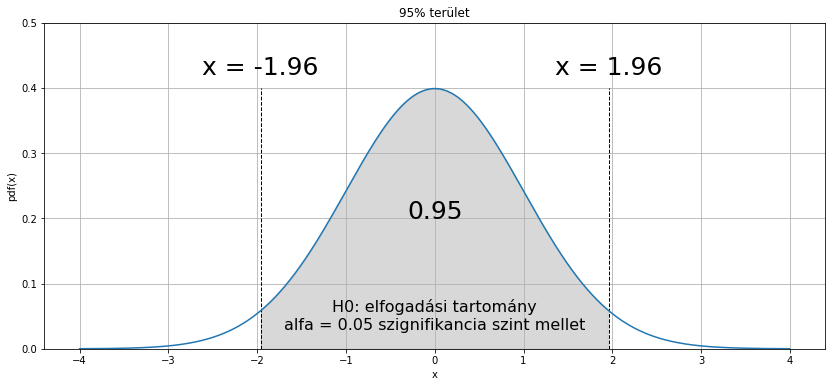

In [ ]:
a,b = stats.norm.interval(alpha=0.95, loc=0, scale=1)
print(a,b)

fig, ax = plt.subplots(figsize=(14,6))

x  = np.arange(-4, 4, 0.001)
px = np.arange(a, b, 0.01)

ax.plot(x, stats.norm.pdf(x)); ax.set_title("95% terület"); ax.set_xlabel('x')
ax.set_ylabel('pdf(x)'); ax.grid(True); ax.set_ylim(0,0.5)
ax.fill_between(px,stats.norm.pdf(px),alpha=0.3, color='grey')
ax.text(-0.0,0.2,"0.95", fontsize=25, horizontalalignment='center')
ax.text(-0.0,0.03,
        "H0: elfogadási tartomány\nalfa = 0.05 szignifikancia szint mellet",
        fontsize=16,
        horizontalalignment='center')
ax.vlines(1.96, 0, 0.4, colors='black', linestyles='--', lw=1)
ax.text(1.96,0.42,"x = 1.96", fontsize=25, horizontalalignment='center')
ax.vlines(-1.96, 0, 0.40, colors='black', linestyles='--', lw=1)
ax.text(-1.96,0.42,"x = -1.96", fontsize=25, horizontalalignment='center')

plt.show()

<a name="egymintas-t-proba"></a>

## Egymintás t-próba <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

Az egymintás esetben a hasonlóság még nagyobb, ugyanis az egymintás t-próba képlete csak annyiban tér el az egymintás u-próbáétól, hogy benne az előre megadott szórás helyén a minta alapján becsült szórás áll. Sőt, az egymintás t- és u-próba a legtöbb alkalmazási feltételben is azonos. Különbség a két próba között – az alkalmazás szintjén – mindössze egy feltételben van, mégpedig abban, hogy az egymintás t-próba nem igényli a vizsgált valószínűségi változó szórásának ismeretét, míg az egymintás u-próba esetében ez eleve adott kell, hogy legyen. (A matematikai háttérben az eltérés nagyobb.)



> Az egymintás t-próba azt vizsgálja, hogy egy mintában egy valószínűségi változó átlaga szignifikánsan különbözik-e egy adott $\mu$ értéktől.

> Itt is feltétel, hogy a vizsgált valószínűségi változó intervallum vagy arányskálán mérték

> A próba $H0$ a próba nullhipotézise, a vizsgált változó átlaga statisztikai szempontból megegyezik az előre megadott $\mu$ értékkel.<br>
Alternatív hipotézise $H1$ a vizsgált változó átlaga statisztikai szempontból nem egyezik meg az előre megadott $\mu$ értékkel.

> A "statisztikai szempontból" kifejezés itt arra utal, hogy az eltérés a mintából kiszámolt átlag és az m érték között olyan minimális, hogy pusztán csak a véletlen ingadozásnak tulajdonítható (ekkor a minta átlaga statisztikai szempontból azonosnak tekinthető az $\mu$-mel), vagy jelentősen nagyobb, mint ami a véletlennel magyarázható (ekkor a minta átlaga statisztikai szempontból nem egyezik meg $\mu$-vel).
<br>
<br>
Tehát a hipotézisünk ugyan az, mint az egymintás u-próba esetében.

Az egymintás t-próba próbastatisztikája:

$$t = \frac{\overline{x} - \mu}{s/\sqrt{n}}$$

ahol, az u-próbához képest csak annyi eltérés van, hogy $\sigma$ helyett $s$ a minta szórásával számolunk.

A szórást a korábban említett képlet alapján számoljuk, ha azonban a minta elemszáma $n < 30$ akkor a szórás helyett a korrigált szórással kell számolni.

$$s^* = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n} (x_i-\overline{x})^2}$$

A csere mögött egy komolyabb megfontolás áll - amely összefüggésben van az átlag kiszámolásával és az elemszám ismeretével - de röviden csak annyit említenék meg, hogy a $n < 30$ esetében a szórás ($s$) torzított míg a korrigált szórás ($s^*)$ torzítatlan becslése a szórásnak.

> **A próba végrehajtásának lépései**

>1. A *t* próbastatisztika kiszámítása.
2. Az $\alpha$ vagyis a p szignifikanca szint megválasztása (0.05 vagy 0.01)
3. A p szignifikanci szinttől függő $t_p$ érték kiválasztása a próbának megfelő t-eloszlás táblázatából, vagy más néven Student féle t-eloszlás táblázatból. A szabadságfok ismeretében - egymintás t-próbánál ez 1 - könnyen leolvasható a táblázatból, hogy adott
> 4. A nullhipotézis elfogadása vagy elvetése
Ha a t-próbastatisztika alapján kapott érték $\geq t_p$ akkor a **nullhipotézist elvetjük** és az alternetív hipotézist tartjuk meg, és úgy értlemezzük, hogy a mintában vizsgált valószínűségi változó átlaga szignifikánsan eltér az adott $\mu$ értéktől (p szignifikancia szint mellett)<br><br>
Ha a t-próbastatisztika alapján kapott érték $\geq t_p$ akkor a **nullhipotézist megtartjuk**, amit úgy interpretálunk, hogy az egymintás t-próba nem mutat ki szignifikáns különbséget a vizsgált valószínűségi változó mintabeli átlaga és az adott m érték között (p szignifikancia szint mellett).

Egy pékségben 500 grammos kenyereket állítanak elő. De a pékek hanyagságából következően néha egy kicsit több, néha kicsit kevesebb anyag jut a kemencébe.

Arra vangyunk kiváncsiak, hogy a pékség átlagos teljesítménye 500 grammos kenyér.

Veszünk egy $n = 10$ elemű mintát és megmérjük a kenyereket. Azt találjuk, hogy a kenyerek súlya<br>
517, 498, 502, 504, 498, 517, 506, 509, 495, 514 gramm. A minta átlaga $\overline{x} = 506$


In [7]:

sample = np.array([517, 498, 502, 504, 498, 517, 506, 509, 495, 514])

print(sample.mean())


506.0


Ahogy már korábban is előfordult, ránézésre nem tudjuk megállapítani, hogy ez a 506 gramm lényegesen eltér-e az 500 g-tól vagy csak a véletlennek tulajdonítható apró eltérésről van szó. Ennek a dilemmának az eldöntésére egymintás t-próbát alkalmazunk.

Feltesszük, hogy a töltőanyag tömege, mint valószínűségi változó normális eloszlást követ. (Hogy ez így van-e azt illeszkedésvizsgálatokkal, azon belül is normalitásvizsgálatokkal lehetne ellenőrizni.) A tömegnek kg-ban való mérése arányskála, így az egymintás t-próba alkalmazásának feltételei teljesülnek. Mivel a minta elemszáma n = 10 < 30 így a szórás becslésére az s* képletet használjuk: s* = 8,05 adódik. Az érték, amelytől a minta átlagának esetleges eltérésére vagyunk kíváncsiak, nyilvánvalóan az $\mu$ = 500 érték. A próbastatisztika képletének minden elemét ismerjük, tehát számítható:

$$t = \frac{\overline{x} - \mu}{s/\sqrt{n}} = \frac{506 - 500}{8,05/\sqrt{10}}\approx 2,36$$


Vegyük a szignifikancia szintet p = 0,05-nek azaz 5%-os kockázatot vállalunk arra, hogy esetleg úgy vetjük el a nullhipotézist, hogy az közben igaz. A szabadsági fok $f = n -1 = 9$, így a $p$ és az $f$ ismeretében a t-eloszlás táblázatából könnyen kikereshetjük a megfelelő táblázatbeli értéket, ami $ t_{p}=t_{0,05}= 1,833$.

<a href="https://en.wikipedia.org/wiki/Student%27s_t-distribution"> Student féle t-eloszlás táblázat</a>

$|t| \approx 2,36$ miatt $2,36 > 1,833$ 95 százalékos $\alpha$ szignifikancia szint melett.<br>
azaz<br>
$\lvert t\rvert \geq t_p$ teljesül, tehát a $H0$ nullhipotézist miszerint a mintában mért átlag alapján a minta származhat egy olyan nagyobb populációból (elméleti) (vagy olynan normális eloszlásból amelynek átlaga 500) elvetjük.

De $p = 0,01$ szignifikancia szint mellett már $|t| = 2,36 < t_{0,01} = 2,821$ ezért az eltérés nem lenne szignifikáns.


https://hu.wikipedia.org/wiki/Egymint%C3%A1s_t-pr%C3%B3ba

<br>

## Python:

> Fenti feladat megoldása Pyhon scipy könyvtár segítségével. A p-érték a számított valószínűsége annak, hogy a megfigyelt jelenséget tapasztaljuk, ha a vizsgálatunk nullhipotézise igaz.


In [8]:


test, p = stats.ttest_1samp(sample, 500, alternative='two-sided')

print('A t-próbastatisztika értéke = {:.5f}'.format(test))
print('A p értéke = {:.5f}'.format(p))



A t-próbastatisztika értéke = 2.35541
A p értéke = 0.04292


## Kétoldali, egyoldali hipotézis vizsgálat

> Az alternatív hipotézisekkel kapcsolatban fontos tisztázni, hogy többféle
formája lehet. Fenti példábákban az alternatív hipotézis az volt, hogy a
populációátlag nem egyezik meg a feltételezett populációátlaggal. Tehát
annál kisebb vagy nagyobb is lehet. Ilyenkor **kétoldali** ellenhipotézisről
beszélünk.

> Az alternatív hipotézis lehet **egyoldali** is, amikor előzetes elképzelés alapján,
csak azt vizsgáljuk, hogy például a populációátlag nagyobb-e, mint a
feltételezett értéke.

0.024997895148220435
0.09452865480086611


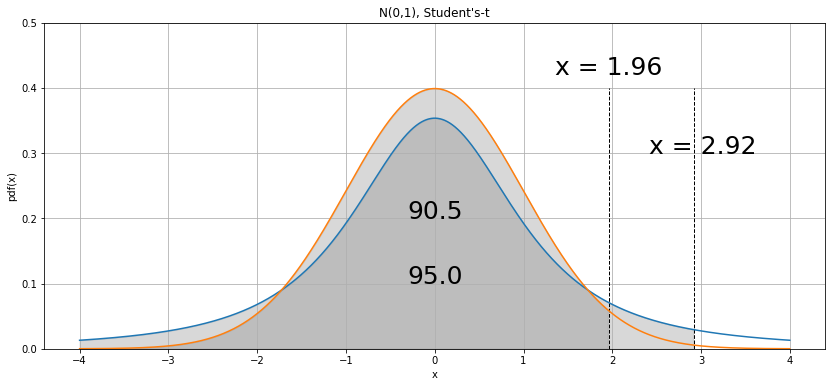

In [9]:
kisebb = 1.96
df = 2

kisebb_mint = stats.norm.cdf(x=0, loc=kisebb, scale=1)
print(kisebb_mint)

kisebb_mint = stats.t.cdf(0, df, kisebb, 1)
print(kisebb_mint)

fig, ax = plt.subplots(figsize=(14,6))

# for distribution curve
x  = np.arange(-4, 4, 0.001)
px = np.arange(-4, kisebb, 0.01)

ax.plot(x, stats.t.pdf(x, df))
ax.plot(x, stats.norm.pdf(x)); ax.set_title("N(0,1), Student's-t"); ax.set_xlabel('x')
ax.set_ylabel('pdf(x)'); ax.grid(True); ax.set_ylim(0,0.5)
ax.fill_between(px,stats.norm.pdf(px),alpha=0.3, color='grey')
ax.text(-0.0,0.2, (1 - round(kisebb_mint,3))*100, fontsize=25, horizontalalignment='center')
ax.text(-0.0,0.03,
        "",
        fontsize=16,
        horizontalalignment='center')
ax.vlines(1.96, 0, 0.4, colors='black', linestyles='--', lw=1)
ax.text(1.96,0.42,"x = 1.96", fontsize=25, horizontalalignment='center')

#mekkora x ha 95% a függvény alatti terület
#Percent point function (inverse of cdf — percentiles).
u95 = stats.t.ppf(0.95, df, loc=0, scale=1)

ax.vlines(u95, 0, 0.4, colors='black', linestyles='--', lw=1)
ax.text(u95 + 0.1,0.30,'x = %s' % (round(u95,2)), fontsize=25, horizontalalignment='center')

# ahol a 95 százalék lefedettség van, ott x = u95
kisebb_mint_where_95 = stats.t.cdf(0, df, u95, 1)
# print(kisebb_mint_where_95) # enenk a 0.05 értéket kell visszaadnia
ax.text(-0.0,0.1, (1 - round(kisebb_mint_where_95,3))*100, fontsize=25, horizontalalignment='center')
px = np.arange(-4, u95, 0.01)
ax.fill_between(px,stats.t.pdf(px, df),alpha=0.3, color='grey')

plt.show()

Fenti ábrának több érdekessége is van:

> 1. össze tudjuk hasonlítani a **normális** és a **Student-féle t-eloszlást**.
Utóbbi alakja az elemszámok növelésével egyre jobban közelít a normális eloszláshoz. (ehhez újra kell futtatni a cellát df = 10, df = 20, df = 30, etc. értékkel)

> 2. Egysezer azt jelenítettem meg, hogy milyen **x** értéknél éri el a függvény alatti terület a 95%-ot. Másodszor pedig azt, hogy mekkora függvény alatti terület tartozik **x = 1.96** értékhez.

> 3. Indirekt módon az is leolvasható az ábrából, hogy a Student-féle t-eloszlás szórása kis elemszámnál nagyobb mint a normális eloszlásé.

In [48]:


test, p = stats.ttest_1samp(sample, 500, alternative='greater')

print('A t-próbastatisztika értéke = {:.5f}'.format(test))
print('A p értéke = {:.5f}'.format(p))



A t-próbastatisztika értéke = 2.35541
A p értéke = 0.02146


<a name="ketmintas-u-proba"></a>

## A kétmintás u-próba <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

### Példa 3:

Azt vizsgáljuk, hogy két mintában egy-egy valószínűségi változó átlagai egymástól szignifikánsan különböznek-e.

Hasonlóan az u-próbához itt van néhány peremfeltétel amelynek teljesülnie kell.

- A változók legyen normális eloszlásúak
- intervallum vagy arányskálán mértek
- szórásaik megegyezzenek

Tegyük fel, hogy két gyártosoron gyártott termékek súlyát szeretnénk összehasonlítan. Ezért $n_x = 75$  és $n_y = 50$ elemű véletlen mintát veszünk mintkét gyártosor termékeiből. Az egyik mintában a termékek sulyának átlaga $\overline{x} = 28$ a másik mintában $\overline{y} = 33$ kilógramm. Ismerjük továbbá a gyártósort készítő cégektől, hogy a termékek szórása $\sigma_x = 14.1$ és $\sigma_y = 9.5$.

A hipotézisünk az, hogy

$H0$ a két minta átlaga megeggyezik $H0: \overline{x} = \overline{y}$<br>
$H1$ a két minta átlaga nem egyezeik meg $H1: \overline{x} ≠ \overline{y}$<br>

<br>

$$ u = \frac{\overline{x} - \overline{y}}{\sqrt{\frac{\sigma_x^{2}}{n_x} + \frac{\sigma_y^{2}}{n_y}}}$$

<br>

$\overline{x}$ a vizsgált valószínűségi változó átlaga a mintában, $103$<br>
$\mu$ az előre adott érték, amihez az átlagot viszonyítjuk, $100$<br>
$\sigma$ a vizsgált valószínűségi változó ismert szórása $15$<br>
$n$ a minta elemszáma $100$<br>

<br>

$$ u = \frac{\overline{x} - \overline{y}}{\sqrt{\frac{\sigma_x^{2}}{n_x} + \frac{\sigma_y^{2}}{n_y}}} = \frac{28 - 33}{\sqrt{\frac{14.1^2}{75} + \frac{9.5^2}{50}}}= -2.368$$

<br>

> próbastatisztika standard normális eloszlást fog követni. Emiatt bármilyen 0 < p < 1 esetén meg lehet határozni azt az $u_{p/2}$ értéket, melyre

$$ 1-p = P\left( -u_{p/2} < \frac{\overline{x} - \overline{y}}{\sqrt{\frac{\sigma_x^{2}}{n_x} + \frac{\sigma_y^{2}}{n_y}}} < u_{p/2} | H_0\right) = \Phi(u_{p/2}) - \Phi(u_{p/2}) = 2\Phi(u_{p/2})-1$$

> ahol $\Phi(x)$ a standard normális eloszlásfüggvény. Ez azt jelenti, hogy ha igaz a nullhipotézis, akkor az u próbastatisztika értéke $1–p$ valószínűséggel a ($–u_{p/2}, u_{p/2}$) intervallumba esik.

A standard normális elsozlás függvény alatti terület $u = -2.368$ értéknél $0.0089$. Mivel **kétoldali hipotézis vizsgálatot** végeztünk ezért ezt az értéket megszorozva kettővel megkapjuk annak a valószínűségét, hogy $P(H0:\overline{x} = \overline{y}) = 0.0178$

Ha előzetesen az $\alpha < 0.05$ szignifikancia szintet határoztuk meg, akkor $H0: \overline{x} = \overline{y}$ nullhipotézist el kell vetnünk.



In [10]:

def ind_u_test(x,y, sigma1, sigma2, n1, n2):
  return (x-y)/(np.sqrt((((sigma1**2)/n1)+((sigma2**2)/n2))))

ind_u_test(28, 33, 14.1, 9.5, 75, 50)


-2.368684181472862

## Megjegyzés:

> A gyakorlatban a kétmintás u-próbát (angol szakirodalomban `two-sample z-test`) nem szokták gyakran alkalmazni, mivel a két populáció szórása általában nem ismert.

> Ehelyett inkább a mintából számolt szórást és kétmintás t-próbát alkalmaznak.




<a name="ketmintas-t-proba"></a>

## Kétmintás t-próba <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

> Hasonlóan a kétmintás u-próbához, itt is két mintában egy-egy valószínűségi változó átlagát hasonlítjuk össze

> A próba $H0$ a próba nullhipotézise, a vizsgált változó átlaga statisztikai szempontból megegyezik a másik változó átlagával.<br>
Alternatív hipotézise $H1$ a vizsgált változó átlaga statisztikai szempontból nem egyezik meg az másik változó átlagával.

> A "statisztikai szempontból" kifejezés itt arra utal, hogy az eltérés a két mintából kiszámolt átlag között olyan minimális, hogy pusztán csak a véletlen ingadozásnak tulajdonítható (ekkor a két minta átlaga statisztikai szempontból azonosnak tekinthető), vagy jelentősen nagyobb, mint ami a véletlennel magyarázható (ekkor a két minta átlaga statisztikai szempontból nem egyezik meg).
<br>
<br>
Tehát a hipotézisünk ugyan az, mint az kétmintás u-próba esetében.

Az kétmintás t-próba próbastatisztikája:

$$t = \frac{\overline{x} - \overline{y}}{\sqrt{(n-1){s_x^{*}}^2 + (m-1){s_y^{*}}^2}}*\sqrt{\frac{nm(n + m - 2}{n + m}}$$

A szórást a korábban említett képlet alapján számoljuk, itt azonban a szórás helyett a korrigált szórással kell számolni.

$$s^* = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n} (x_i-\overline{x})^2}$$

A csere mögött egy komolyabb megfontolás áll - amely összefüggésben van az átlag kiszámolásával és az elemszám ismeretével - de röviden csak annyit említenék meg, hogy a $n < 30$ esetében a szórás ($s$) torzított míg a korrigált szórás ($s^*)$ torzítatlan becslése a szórásnak.

> **A próba végrehajtásának lépései**

>0. A próba feltétele a **szórások egyezése**, amelyet az F-próba segítségével ellenőrizhetünk. Csak akkor alkalmazhatjuk a kétmintás t-próbát ha az F-próba a szórások között szignifikáns különbséget nem tud kimutatni. Ha szignifikáns különbséget mutat ki, akkor a kétmintás t-próbát nem lehet alkalmazni, de helyette alkalmazható az ugyanezt a nullhipotézist vizsgáló Welch-próba, ami nem igényli a szórások egyezését.
1. A *t* próbastatisztika kiszámítása.
2. Az $\alpha$ vagyis a p szignifikanca szint megválasztása (0.05 vagy 0.01)
3. A p szignifikanci szinttől függő $t_p$ érték kiválasztása a próbának megfelő t-eloszlás táblázatából, vagy más néven Student féle t-eloszlás táblázatból. A szabadságfok ismeretében - egymintás t-próbánál ez 1 - könnyen leolvasható a táblázatból. A kétmintás t-próba esetén a szabadságfok n + m - 2.
> 4. A nullhipotézis elfogadása vagy elvetése
Ha a t-próbastatisztika alapján kapott érték $\geq t_p$ akkor a **nullhipotézist elvetjük** és az alternetív hipotézist tartjuk meg, és úgy értlemezzük, hogy a két mintában vizsgált valószínűségi változó átlaga szignifikánsan eltér (p szignifikancia szint mellett)<br><br>
Ha a t-próbastatisztika alapján kapott érték $\geq t_p$ akkor a **nullhipotézist megtartjuk**, amit úgy interpretálunk, hogy az kétmintás t-próba nem mutat ki szignifikáns különbséget a két vizsgált valószínűségi változó mintabeli átlagai között (p szignifikancia szint mellett).



### Példa 4:

Tegyük fel, hogy van két mezőgazdasái farm, ahol almákat termesztenek. Az egyik délen a másik az ország északi felében. A feltételezésünk az, hogy a déli országrészben a magasabb napsütéses órák száma miatt nagyobbra nőnek az almák. Ezért arra vagyunk kiváncsiak, hogy a két farmon termelt almák mérete között van-e különbség. Mindkét farmon véletlenszerűen kiválasztanak $n = 8$ és $m = 11$ almát és megmérik a súlyukat. Az így kapott adatokat feljegyzik és a következő számítást végezzük el.

Az északi farmon 52, 57, 62, 55, 64, 57, 56, 55.<br>
A déli farmon 41, 34, 33, 36, 40, 25, 31, 37, 34, 30, 38.

Arra vagyunk kíváncsiak, hogy a két csoport átlagos tömege közötti különbség szignifikáns-e, vagy nem nagyobb annál, mint amit a véletlen mintavételből fakadóan a puszta véletlennel is magyarázni lehet. 

Miután ellenőriztük, hogy a két csoport szórása azonosnak tekinthető-e [ <a href="#f-proba">erről itt írok</a> ] kiszámoljuk a t-próbastatisztikát:

<br>

$$t = \frac{57.25 - 34.45}{\sqrt{7*{3.92}^2 + 10*{4.68}^2}}*\sqrt{\frac{8*11(8 + 11 - 2}{8 + 11}} \approx 11,12$$

<br>

A szignifikancia szintet p = 0,05-nek véve és az f = n + m – 2 = 17 szabadsági fok ismeretében a t-táblázatban a $t_{0,05}$ = 1,740 értéket találjuk, így mivel a 11,12 t-próbastatisztika értéke nagyobb mint a $t_{0,05}$ szignifikancia értékhez tartozó 1,74, ezért a **nullhipotézist elvetjük**. t táblázat itt látható <a href="https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf">ugrás</a>

## A próba matematikai háttere

A próba matematikai hátterének legfontosabb gondolata, hogy bármely $X$ és $Y$ független, normális eloszlású valószínűségi változóra vett $n$ elemű minták esetén a fent leírt képlet alapján a $t$ értéke úgynevezett $(m+n-2)$ szabadságfokú t-eloszlást követ. Emiatt a $(n+m-2)$ szabadságfokú t-eloszlás ismeretében bármilyen $1 > p > 0$ estén meg lehet mondani:

$$1-p = \mathbf{P}\left( -t_p < \frac{\overline{x} - \overline{y}}{\sqrt{(n-1){s_x^{*}}^2 + (m-1){s_y^{*}}^2}}*\sqrt{\frac{nm(n + m - 2}{n + m}} <t_p | H_0 \right)$$

Ami azt jelenti, hogy ha igaz a nullhipotézis, akkor a $t$ próbastatisztika értéke $1-p$ valószínűséggel a ($-t_p, t_p$) intervallumba esik.

$$1-p = \mathbf{P}\left( -t_p < 11,12 <t_p | H_0 \right)$$

$$1-0.05 = \mathbf{P}\left( -t_{0.05} < 11,12 <t_{0.05} | H_0 \right)$$

$$1-0.05 = \mathbf{P}\left( -1.740 < t < 1.740 | H_0 \right)$$

**!** Huh ebben a tanárnő segítségét kérni - hogy jól értelmeztem-e.

## Emlékeztető

1. Az általunk meghatározott **p szignifikancia szint** az **elsőfajú hiba elkövetésének valószínűségét adja meg**.

 Ha el tudom vetni a nullhipotézist, akkor ekkora kockázatot vállalok arra nézve, hogy esetleg hiba elvetni.

## További olvasmány

1. Nagyon érdekes téma. A t-eloszlásról sok helyhen lehet olvasni. Kiinduló pontnak a folytatáshoz https://en.wikipedia.org/wiki/Student%27s_t-distribution

<br>

## Python



In [6]:

eszaki = np.array([52, 57, 62, 55, 64, 57, 56, 55])

deli   = np.array([41, 34, 33, 36, 40, 25, 31, 37, 34, 30, 38])

x = eszaki.mean(); y = deli.mean()
Sx = eszaki.std(ddof=1); Sy = deli.std(ddof=1)
nx = eszaki.size; ny = deli.size

print('Északi minta átlag = {:.3f}, szórás = {:.3f}, n = {:.0f}'.format(x, Sx, nx))
print('Déli minta átlag   = {:.3f}, szórás = {:.3f}, n = {:.0f}'.format(y, Sy, ny))

# A p-érték a számított valószínűsége annak, hogy a megfigyelt jelenséget tapasztaljuk, ha a vizsgálatunk nullhipotézise igaz.

# ha a p-érék kissebb lenne mint az előre meghatározott szignifikancia szint,
# akkor el kellene vetnünk a nullhipotézisünket (miszert mintaátlag = populációs átlag)

t, p = stats.ttest_ind(eszaki, deli, equal_var=True)

if p < 0.05:
  print("{:.5f} p < 0.05 tehát elvetjük a nullhipotézist".format(p))
else:
  print("{:.5f} p > 0.05 elfogadjuk a nullhipotézist".format(p))

print("t-próbastatisztika = {:.5f} ".format(t))


Északi minta átlag = 57.250, szórás = 3.919, n = 8
Déli minta átlag   = 34.455, szórás = 4.677, n = 11
0.00000 p < 0.05 tehát elvetjük a nullhipotézist
t-próbastatisztika = 11.19895 


<a name="paros-t-proba"></a>

## Páros t-próba <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

$X_1 \sim N(m_1, \sigma_)$, $X_1 \sim N(m_2, \sigma_2)$

A hipotézisek:

$H0: m_1 = m_2$<br>
$H0: m_1 \neq m_2$

Tegyük fel, hogy tesztelni szeretnénk egy gyógyszert arra vagyunk kiváncsiak, hogy csökkenti-e a páciensek vérnyomását a bevétel után 1 órával.
Ezért megmérjük a vérnyomást a bevétel előtt és a bevételt követő első órában.
Ilyen módon adatpárokat kapunk.

```
elotte = np.array([120, 111, 131, 123, 150, 125, 140, 130, 129, 110, 119, 115, 150])

utana  = np.array([111, 109, 127, 120, 143, 120, 136, 128, 129, 111, 121, 112, 148])
```

A t-próbastatisztika:

$$ t = \frac{(m_1 - m_2) - 0}{\frac{S(m_1-m_2)}{\sqrt{n}}} = \frac{(127.15 - 124.23) - 0}{\frac{3.04}{\sqrt{13}}} \approx -3.47$$

A feltevések miatt ezt egymintás t-próbaként kezelhetjük, a statisztika 19 szabadságfokú t-eloszlású lesz. A mintából számolt t-érték: $t_{13}^{0} = -3.47$. Kétoldali alternatív hipotézisünk van, igy $\alpha = 0.05$ szignifikancia szintet választva, a kritikus érték $t_{12}^{0} 0.05 = -1.782$ és az álltalunk kapott próbastatisztika a kritikus tartományon kívűl esik, ezért a nullhipotézist elvetjük.


Mivel a páros T-próba eredménye:


```
# Ttest_relResult(statistic=3.4665030723517516, pvalue=0.00466091742444482)
```


Ha alpha = 0.05 vagyis 95%-os szignifikancia szintet választunk akkor el kell
vetnünk a null hipotézist, hogy a két minta átlaga megegyezik. Ezáltal arra a következtetésre juthatunk,
hogyha körültekintően jártunk el, és minden tényezőt kizártunk a vizsgálatból,
akkor a megfigyelt hatást csakis a gyógyszer bevételnék tulajdoníthatjuk.


In [2]:


elotte = np.array([120, 111, 131, 123, 150, 125, 140, 130, 129, 110, 119, 115, 150])

utana  = np.array([111, 109, 127, 120, 143, 120, 136, 128, 129, 111, 121, 112, 148])

y = utana - elotte

y_m = y.mean()
y_s = y.std(ddof=1)

t = y_m/(y_s/np.sqrt(y.size))

print('t test statistic = {0}'.format(t))

print(stats.t.ppf(0.05, y.size - 1))

# A null  hipotézisünk  {H0:} hogy az elötte átlag = az utána átlaggal
# Az alternatív hipotézis {H1:} hogy az elötte átlan nem = az utána átlaggal

stats.ttest_rel(elotte, utana)



t test statistic = -3.4665030723517516
-1.7822875556491593


Ttest_relResult(statistic=3.4665030723517516, pvalue=0.00466091742444482)

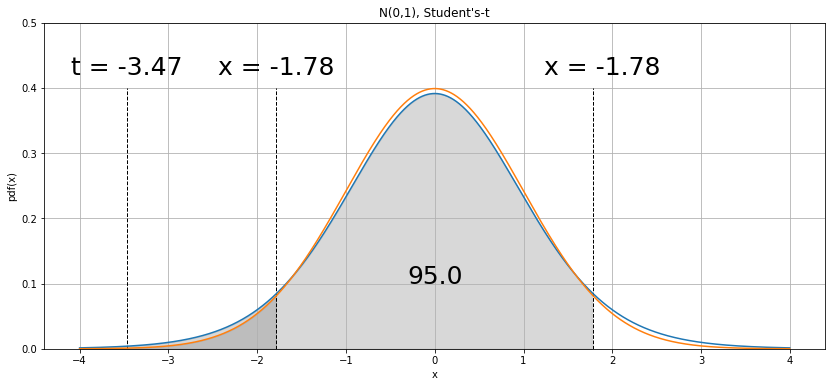

In [3]:
kisebb = 1.96
df = y.size

# kisebb_mint = stats.norm.cdf(x=0, loc=kisebb, scale=1)
# print(kisebb_mint)

# kisebb_mint = stats.t.cdf(0, df, kisebb, 1)
# print(kisebb_mint)

alpha = 0.05
elutasitas = stats.t.ppf(alpha, y.size - 1)

tvalue, _ = stats.ttest_rel(elotte, utana)


fig, ax = plt.subplots(figsize=(14,6))

# for distribution curve
x  = np.arange(-4, 4, 0.001)
px = np.arange(-4, elutasitas, 0.01)

ax.plot(x, stats.t.pdf(x, df))
ax.plot(x, stats.norm.pdf(x)); ax.set_title("N(0,1), Student's-t"); ax.set_xlabel('x')
ax.set_ylabel('pdf(x)'); ax.grid(True); ax.set_ylim(0,0.5)
ax.fill_between(px,stats.norm.pdf(px),alpha=0.3, color='grey')

ax.vlines(elutasitas, 0, 0.4, colors='black', linestyles='--', lw=1)
ax.text(elutasitas,0.42,'x = %s' % (round(elutasitas, 2)), fontsize=25, horizontalalignment='center')

ax.vlines(-elutasitas, 0, 0.4, colors='black', linestyles='--', lw=1)
ax.text(-elutasitas + 0.1,0.42,'x = %s' % (round(elutasitas,2)), fontsize=25, horizontalalignment='center')

# a próbastatisztika t-értéke
ax.vlines(-tvalue, 0, 0.4, colors='black', linestyles='--', lw=1)
ax.text(-tvalue ,0.42,'t = %s' % (round(-tvalue, 2)), fontsize=25, horizontalalignment='center')


#mekkora x ha 95% a függvény alatti terület
#Percent point function (inverse of cdf — percentiles).
u95 = stats.t.ppf(0.95, df, loc=0, scale=1)


# ahol a 95 százalék lefedettség van, ott x = u95
kisebb_mint_where_95 = stats.t.cdf(0, df, u95, 1)
# print(kisebb_mint_where_95) # enenk a 0.05 értéket kell visszaadnia
ax.text(-0.0,0.1, (1 - round(kisebb_mint_where_95,3))*100, fontsize=25, horizontalalignment='center')
px = np.arange(-4, u95, 0.01)
ax.fill_between(px,stats.t.pdf(px, df),alpha=0.3, color='grey')

plt.show()

## F-próba

A kétmintás t-próba esetében fontos kérdés a varianciák egyezősége vagy különbözősége. Azért fontos tudnunk, hogy a varianciák milyenek a két mintában, mert a középértéktől való eltérés (jelen esetben az átlagtól való eltérés) másképp is alakulhat annak ellenére, hogy az átlagok megegyeznek (lásd lent)



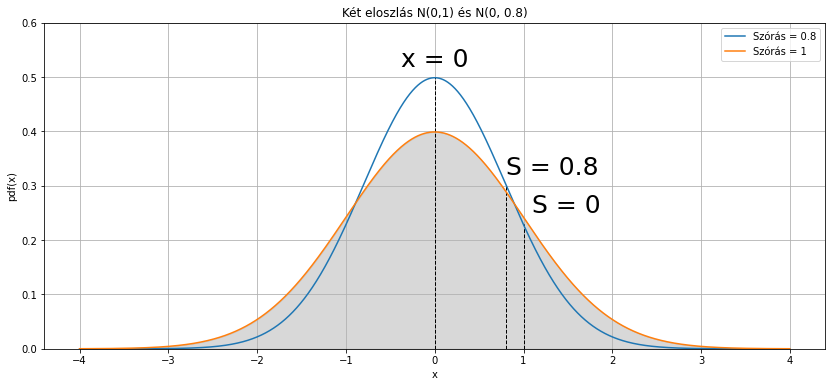

In [33]:
fig, ax = plt.subplots(figsize=(14,6))

x  = np.arange(-4, 4, 0.001)
px = np.arange(-4, 4, 0.01)

ax.plot(x, stats.norm.pdf(x, scale=0.8), label="Szórás = 0.8")
ax.plot(x, stats.norm.pdf(x), label="Szórás = 1"); ax.set_title("Két eloszlás N(0,1) és N(0, 0.8)"); ax.set_xlabel('x')
ax.set_ylabel('pdf(x)'); ax.grid(True); ax.set_ylim(0,0.6)
ax.fill_between(px,stats.norm.pdf(px),alpha=0.3, color='grey')

ax.vlines(0, 0, 0.5, colors='black', linestyles='--', lw=1)
ax.text(0,0.52,'x = %s' % (round(0, 2)), fontsize=25, horizontalalignment='center')

ax.vlines(1, 0, 0.23, colors='black', linestyles='--', lw=1)
ax.text(1 + 0.1,0.25,'S = %s' % (round(0,2)), fontsize=25, horizontalalignment='left')

ax.vlines(0.8, 0, 0.3, colors='black', linestyles='--', lw=1)
ax.text(0.8 ,0.32,'S = %s' % (round(0.8, 2)), fontsize=25, horizontalalignment='left')

ax.legend()
plt.show()

*a, Figyeljük meg, hogy mi történne akkor, ha a kétmintás t-próbával csak az átlagok egyezőségéről döntenénk! Azt mondanánk, hogy a két minta megegyezik, holott a szórásokból meghatározott variancia rámutat a minták különbözőségére.*


A varianciák egyezésének megállapítása az F-próba segítségével történik, amelyet bemutatunk a kézi számítás részben. Ha az F-próba segítségével azt állapítjuk meg, hogy a varianciák egyeznek, akkor a klasszikus kétmintás t-próbát alkalmazzhatjuk.

## De hogyan néz ki a az F-próba

$$ F = \frac{max(SD_x^{2}, SD_y^{2})}{min(SD_x^{2}, SD_y^{2})}$$

Ahol a számlálóba kerül a nagyobb szórás varianciája (szórásnégyzet), a nevezőbe pedig a kisebb szórás négyzete (varianciája). Az itt kapott értéket az F táblázatból keressük meg, ahol szabadságfok (df) a számlálóban szereplő (szóráshoz tartozó elemszám-1), illetve a nevezőben szereplő (szóráshoz tartozó elemszám-1). <a href="https://www.stat.purdue.edu/~jtroisi/STAT350Spring2015/tables/FTable.pdf">F táblázat itt található.</a>

Amennyiben az általunk kapott F érték nagyobb, mint a táblázatban szereplő F érték, akkor a különbség szignifikáns, vagyis a varianciák eltérőek!





<a name="fuggetlen-mintas-t-proba"></a>

## Független mintás t-próba <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>


In [ ]:
# Tegyük fel, hogy csak a minták átlaga és átlagtól való átlagos eltérése ismert

mean_ferfi = df['male'].mean()
mean_no    = df['female'].mean()

std_ferfi = df['male'].std()
std_no    = df['female'].std()

n_ferfi = df['male'].count()
n_no    = df['female'].count()

print(mean_ferfi)
print(mean_no)

print(std_ferfi)
print(std_no)

print(n_ferfi)
print(n_no)

stats.ttest_ind_from_stats(mean_ferfi, std_ferfi, n_ferfi, mean_no, std_no, n_no)

# Mivel a próbához taroz

168.6
158.6
11.306262819666294
11.306262819666294
20
20


Ttest_indResult(statistic=2.7969256602348413, pvalue=0.008051817012053871)

In [ ]:
stats.ttest_ind_from_stats(156, 10, 20, 160, 20, 20)

Ttest_indResult(statistic=-0.8, pvalue=0.4286838276590448)

<a name="egymintas-t-proba (2)"></a>

## Egymintás t-próba (2)<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

Egymintás t-próbával határozhatjuk meg, hogy egy adott mintában megfigyelt átlag, különbözik-e az ismert populációs átlagtól.


Alábbi példában azt a hipotézist vizsgálom, hogy egy 20 elemű mintában a minta átlag származhat egy adott átlagú és eloszlású populációból.

In [11]:
# Generálok 20 esetet, N(170, 10):

np.random.seed(1)
mu, sigma = 170, 10
maleRnd = np.random.normal(loc = mu, scale = sigma, size = 20)
maleInts = np.round(maleRnd)

In [12]:
# Generálok 20 esetet, N(160, 10):

np.random.seed(1)
mu, sigma = 160, 10
femaleRnd = np.random.normal(loc = mu, scale = sigma, size = 20)
femaleInts = np.round(femaleRnd)

In [14]:
df = pd.DataFrame(maleInts, columns = ['male'])
df['female'] = femaleInts

In [15]:
# H0: a populációs átlag 170

stats.ttest_1samp(df['male'], 170)

# A p-érték a számított valószínűsége annak, hogy a megfigyelt jelenséget tapasztaljuk, ha a vizsgálatunk nullhipotézise igaz.

Ttest_1sampResult(statistic=-0.5537630282314834, pvalue=0.5861996925691939)

In [16]:
# H0: a populációs átlag > 170

1 - stats.t.cdf(-0.5608359734682287, 20)

0.7094305512705925

<a name="korrelacio"></a>

## A korreláció<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>


A többváltozós statisztikai próbák, ellentétben például az egyszerű szignifikanciapróbákkal, a legalkalmasabb módszerek az adatok/változók közötti összefüggések feltárására. Bárhogy vizsgálódunk, alapvetően két metódust fogunk alkalmazni: az előfeltételezéssel bíró feltárásokat és az előfeltételezéssel nem bíró feltárásokat. 

Általánosságban a korrelációszámítást inkább akkor használjuk, amikor nincs szilárd előfeltételezésünk a változók közötti kapcsolat irányáról.

A korrelációszámítás esetében emlékezzünk mindig arra, hogy a változók valószínűségi változók, tehát oda-vissza jelezhetnek ok-okozati kapcsolatot, melynek helyességéről való döntés rajtunk múlik.

Példa:

Napsütéses órák száma/nap és Napi átlagos középhőmérséklet. Ezen a nyilvánvalóan egyszerű példán keresztül el lehet képzelni, hogy van valamilyen egyenes arányú összefüggés a két változó között.

Ellentétes irányú korreláció is lehetséges. Ebben az esetben az egyik adatsor értékeinek a változása ellentétesen mozgatja a másik adatsor értékeinek a változását.

Ahhoz, hogy a korrelációt megértsük, előbb tisztázzk a **Kovariancia** fogalmát.





## Mi a kovariancia?

N számú X, Y valós számú értékpárokra a minta kovarianciája:

$$cov(X,Y) = \sigma{XY} = \sum_{x,y}(x-\overline{x})(y-\overline{y})$$

Tehát a ha a két változónk $x$ és $y$ akkor a minden egyes elemre kivonjuk az adott változó átlagát és összeszorozzuk a másik változó átlagtól való eltérésével.

#### A változó kovarianciája önmagával
A szórás a kovariancia egy speciális esete, ahol a két változó azonos.

${\displaystyle \operatorname {cov} (X,X)=\operatorname {var} (X)\equiv \sigma ^{2}(X)\equiv \sigma _{X}^{2}.}$


#### Két változó korrelálatlansága, függetlensége
Két olyan változót amelynek a kovariánciája 0 korrelálatlannak hívunk.

Ha $X$ és $Y$ egymástól független valószínűségi változók, akkor a kovarianciájuk 0. Függetlenség esetén a a két változó szorzatának várható értéke egyenlő a a két változó várható értékének szorzatával.

${E} [XY]= {E} [X]\cdot \operatorname {E} [Y]$



Habár ez az összefüggés nem mindíg igaz. Például, legyen $X$ egyenletes eloszlú változó $[-1,1]$ tartományban és legye $Y=X^{2}$. Tisztán belátható, hogy $X$ és $Y$ nem függetlenek, de

\begin{aligned}\operatorname {cov} (X,Y)&=\operatorname {cov} \left(X,X^{2}\right)\\&=\operatorname {E} \left[X\cdot X^{2}\right]-\operatorname {E} [X]\cdot \operatorname {E} \left[X^{2}\right]\\&=\operatorname {E} \left[X^{3}\right]-\operatorname {E} [X]\operatorname {E} \left[X^{2}\right]\\&=0-0\cdot \operatorname {E} [X^{2}]\\&=0.\end{aligned}


alapján a két változó Covarianciája 0. Ebben az esetben az $Y$ és $X$ változó közötti kapcsolat nem-linearis. A korreláció és a kovariancia linearis kapcsolatot vizsgálja két változó között. Fenti példa azt mutatja, hogy ha két változó között a kovariancia 0, az nem feltétlenül jelenti azt, hogy függetlenek.

#### A minta kovarianciájának kiszámolása

A minta kovarianciája $K$ számú változó $N$ megfigyelése alapján $K\times K$ matrix $\overline{\mathbf {q}} = \left[q_{jk}\right]$

$ q_{jk}={\frac {1}{N-1}}\sum _{i=1}^{N}\left(X_{ij}-{\bar {X}}_{j}\right)\left(X_{ik}-{\bar {X}}_{k}\right)$, amely a kovariancia becslése $j$ és $k$ változó között.

In [45]:
# Példa:

# Két változó független ha E(xy) = E(x) * E(y)

a = np.array([1,2,3,4,5])
b = np.array([30,40,30,40,30])

m1 = a.mean()
m2 = b.mean()

szorzat = a*b

exy = szorzat.mean()

exey = m1*m2

print(exy)
print(exey)

102.0
102.0


In [34]:
# Loading built-in Datasets:
iris = sns.load_dataset('iris')

In [35]:
petal = iris.loc[:,['petal_length', 'petal_width', 'species']]

In [36]:
def covariance(x, y):
  mean_x = x.mean()
  mean_y = y.mean()
  centered_x = x - mean_x
  centered_y = y - mean_y
  product = centered_x * centered_y
  sum = product.sum()
  cov = sum * (1/(x.size - 1))
  return cov
  

In [37]:
covariance(petal['petal_length'].values, petal['petal_width'].values)

1.2956093959731543

In [38]:
petal.cov()

,petal_length,petal_width
petal_length,3.116278,1.295609
petal_width,1.295609,0.581006


In [39]:
a = np.linspace(0, 1, 150)
b = a**2

In [40]:
covariance(a, b)

0.08501869285167334

In [2]:
%%capture
!pip install imgaug==0.2.5
!pip install scipy==1.6.2

import math
import numpy as np
import pandas as pd
import scipy as scipy
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


In [ ]:
# Generálok 200 esetet, N(170, 10):

mu, sigma = 170, 10
randomNums = np.random.normal(loc = mu, scale = sigma, size = 1000)
randomInts = np.round(randomNums)


Vegyünk mintát egy normal (Gaussian) eloszlású változóból.

A normális eloszlás első deriváltja a sűrűségfüggvénye, amelyenek alakja haranggörbe.

A természetben gyakran figyelhetünk meg normális eloszlásokat.

A normális eloszláshoz sűrűség függvénye:

$$
p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}
e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }
$$

$\mu$ az átlag és $\sigma$ a standard eltérés (standard deviation). A standard eltérés négyzetét, $\sigma^2$, hívják varianciának.

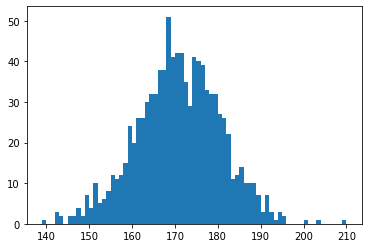

In [ ]:

# Plot:
axis = np.arange(start=min(randomInts), stop = max(randomInts) + 1)
plt.hist(randomInts, bins = axis)
plt.show()


In [ ]:
# Verify the mean and the variance:

abs(mu - np.mean(randomInts))

0.38999999999998636

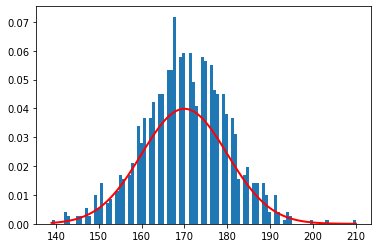

In [ ]:
count, bins, ignored = plt.hist(randomInts, 100, density=True)

def normal_distribution(mu, sigma, x):
   b = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))
   return b

plt.plot(bins, normal_distribution(mu, sigma, bins), linewidth=2, color='r')
plt.show()

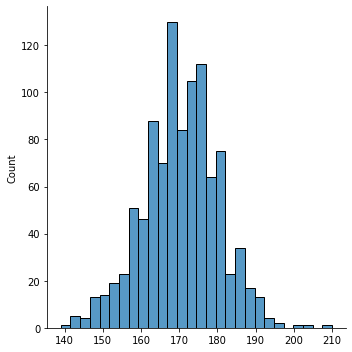

In [ ]:
sns.displot(randomInts,  kde=False, label='Height')
plt.show()

In [ ]:
def normal_distribution(mu, sigma, x):
   b = 1/((np.sqrt(np.pi)*sigma)) * np.exp(-0.5*((x-mu)/sigma)**2)
   return b


<a name="normalis_eloszlas"></a>

> [vissza a tartalomhoz](#tartalom)<br>

## What is Normal Distribution?
A Normal Distribution is also known as a Gaussian distribution or famously Bell Curve. People use both words interchangeably, but it means the same thing. It is a continuous probability distribution.

The probability density function (pdf) for Normal Distribution:

### Empirical rule tells us that:

68% of the data falls within one standard deviation of the mean.
95% of the data falls within two standard deviations of the mean.
99.7% of the data falls within three standard deviations of the mean.
It is by far one of the most important distributions in all of the Statistics. The normal distribution is magical because most of the naturally occurring phenomenon follows a normal distribution. For example, blood pressure, IQ scores, heights follow the normal distribution.

## 0. Calculating Probabilities with Normal Distribution

To find the probability of a value occurring within a range in a normal distribution, we just need to find the area under the curve in that range. i.e. we need to integrate the density function.

Since the normal distribution is a continuous distribution, the area under the curve represents the probabilities.

Before getting into details first let’s just know what a Standard Normal Distribution is.

A standard normal distribution is just similar to a normal distribution with mean = 0 and standard deviation = 1.

Z = (x-μ)/ σ

The z value above is also known as a z-score. A z-score gives you an idea of how far from the mean a data point is. 

If we intend to calculate the probabilities manually we will need to lookup our z-value in a z-table to see the cumulative percentage value. Python provides us with modules to do this work for us. Let’s get into it.

## 1. Creating the Normal Curve
We’ll use scipy.norm class function to calculate probabilities from the normal distribution.

Suppose we have data of the heights of adults in a town and the data follows a normal distribution, we have a sufficient sample size with mean equals 5.3 and the standard deviation is 1.

This information is sufficient to make a normal curve.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Probability Density')

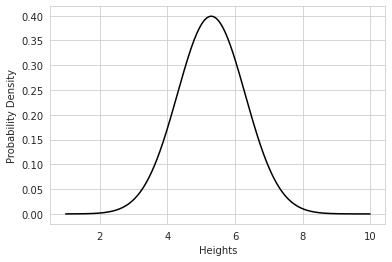

In [ ]:
# import required libraries
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
 
# Creating the distribution
data = np.arange(1,10,0.01)
pdf = norm.pdf(data , loc = 5.3, scale = 1 )
 
#Visualizing the distribution
 
sb.set_style('whitegrid')
sb.lineplot(data, pdf , color = 'black')
plt.xlabel('Heights')
plt.ylabel('Probability Density')

The norm.pdf( ) class method requires loc and scale along with the data as an input argument and gives the probability density value. loc is nothing but the mean and the scale is the standard deviation of data. the code is similar to what we created in the prior section but much shorter.

## 2. Calculating Probability of Specific Data Occurance

Now, if we were asked to pick one person randomly from this distribution, then what is the probability that the height of the person will be smaller than 4.5 ft. ?

In [ ]:
norm(loc = 5.3 , scale = 1).cdf(4.5)

0.21185539858339675

The single line of code above finds the probability that there is a 21.18% chance that if a person is chosen randomly from the normal distribution with a mean of 5.3 and a standard deviation of 1, then the height of the person will be below 4.5 ft.

We initialize the object of class norm with mean and standard deviation, then using .cdf( ) method passing a value up to which we need to find the cumulative probability value. The cumulative distribution function (CDF) calculates the cumulative probability for a given x-value.

Cumulative probability value from -∞ to ∞ will be equal to 1.

Now, again we were asked to pick one person randomly from this distribution, then what is the probability that the height of the person will be between 6.5 and 4.5 ft. ?

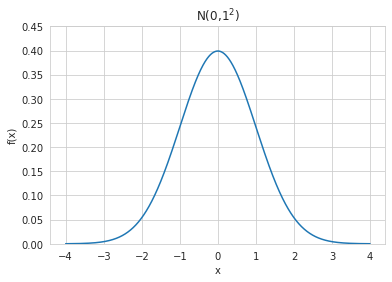

In [ ]:

x = np.arange(-4,4,0.001)

plt.title('N(0,$1^2$)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, norm.pdf(x))
plt.ylim(0,0.45)
plt.show()

A normal curve is smooth bell-shaped. It is symmetrical about the 𝑥=𝜇 and has a maximum point at 𝑥=𝜇.

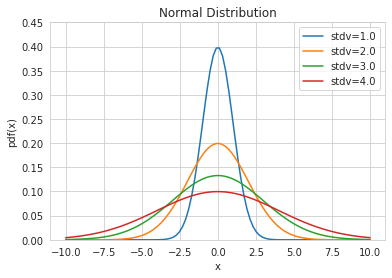

In [ ]:

x = np.linspace(-10,10,100)
stdvs = [1.0, 2.0, 3.0, 4.0]

for s in stdvs:
    plt.plot(x, norm.pdf(x,scale=s), label='stdv=%.1f' % s)
    
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.title('Normal Distribution')
plt.legend(loc='best', frameon=True)
plt.ylim(0,0.45)
plt.grid(True)

## A cumulative normal distribution function
The cumulative distribution function of a random variable X, evaluated at x, is the probability that X will take a value less than or equal to x. Since the normal distribution is a continuous distribution, the shaded area of the curve represents the probability that X is less or equal than x.

$$P(X<=x) = F(x) = \int_{a}^{b} f(t) \,dt, where\ x\in \mathbb{R}$$

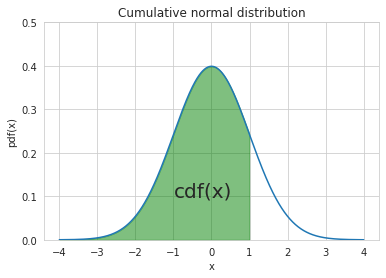

In [ ]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Cumulative normal distribution")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,1,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='g')
# for text
ax.text(-1,0.1,"cdf(x)", fontsize=20)
plt.show()

## Calculating the probability of normal distribution
Given the mean of 3 and the standard deviation of 2, we can find the probability of $P(X<2)$

$$X \sim N(3,2^{2})$$

In `norm.cdf`, the location (loc) keyword specifies the mean and the scale (scale) keyword specifies the standard deviation.


In [ ]:
from scipy.stats import norm

kisebb_mint = norm.cdf(x=2, loc=3, scale=2)
print(kisebb_mint)

0.3085375387259869


0.3085375387259869


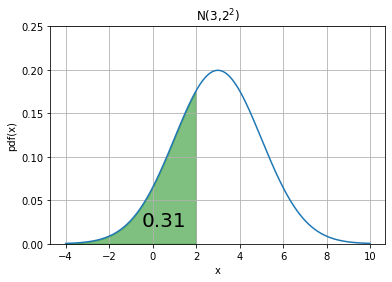

In [ ]:

kisebb_mint = stats.norm.cdf(x=2, loc=3, scale=2)
print(kisebb_mint)

fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,10,0.001)
ax.plot(x, stats.norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,stats.norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')
# for text
ax.text(-0.5,0.02,round(kisebb_mint,2), fontsize=20)
plt.show()

Interval between variables
To find the probability of an interval between certain variables, you need to subtract cdf from another cdf. Let's find $P(0.5 < X < 2)$ with a mean of 1 and a standard deviation of 2. $X \sim N(1,2^{2})$

In [ ]:
norm(1, 2).cdf(2) - norm(1,2).cdf(0.5)

0.2901687869569368

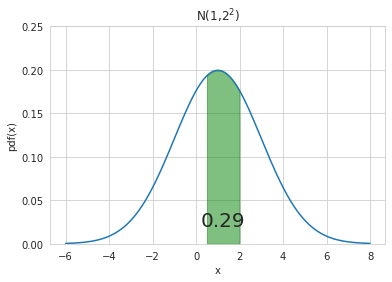

In [ ]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-6,8,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=2))
ax.set_title("N(1,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(0.5,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=1,scale=2),alpha=0.5, color='g')
pro=norm(1, 2).cdf(2) - norm(1,2).cdf(0.5)
ax.text(0.2,0.02,round(pro,2), fontsize=20)
plt.show()

To find the probability of 𝑃(𝑋>4), we can use sf which is called the survival function and it returns 1-cdf. For example, norm.sf(x=4, loc=3, scale=2 returns the probability which is greater than 𝑥=4,𝑃(𝑋>4) when 𝜇=4,𝜎=2.

In [ ]:
gr4sf=norm.sf(x=4, loc=3, scale=2)
gr4sf

0.3085375387259869

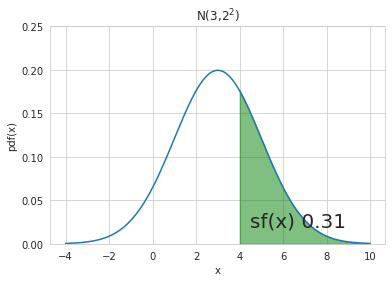

In [ ]:
fig, ax = plt.subplots()
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(4,10,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')
ax.text(4.5,0.02,"sf(x) %.2f" %(gr4sf), fontsize=20)
plt.show()

## Finding quantiles
𝑘 in 𝑃(𝑋≤𝑘)=0.95
is known as quantile, in this case, the 95% quantile.

### Percent point function
ppf is the inverse of cdf and it is called the Percent point function. Given the mean of 1 and the standard deviation of 3, we can find the quantile a in 𝑃(𝑋<𝑎)=0.506 by using ppf. $X \sim N(1,2^{3})$

In [ ]:
norm.ppf(q=0.506, loc=1, scale=3)

1.045121010035907

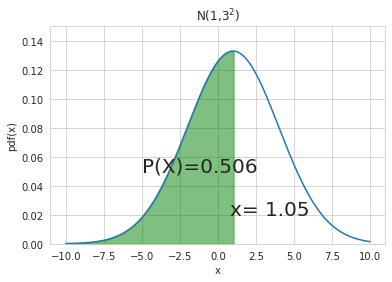

In [ ]:
fig, ax = plt.subplots()
x= np.arange(-10,10,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=3))
ax.set_title("N(1,$3^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
xpoint=norm.ppf(q=0.506, loc=1, scale=3)
px=np.arange(-10,xpoint,0.01)
ax.set_ylim(0,0.15)
ax.fill_between(px,norm.pdf(px,loc=1,scale=3),alpha=0.5, color='g')
ax.text(.8,0.02,"x= %.2f" %xpoint, fontsize=20)
ax.text(-5,0.05,"P(X)=0.506", fontsize=20)
plt.show()

## Interval around the mean
`norm.interval` returns endpoints of the range that contains the alpha percent of the distribution. For example, with a mean of 0 and a standard deviation of 1 to find 95% of the probability, `norm.interval` returns x values around the mean, in this case, 𝜇=0.

In [ ]:
a,b = norm.interval(alpha=0.95, loc=0, scale=1)
print(a,b)

-1.959963984540054 1.959963984540054


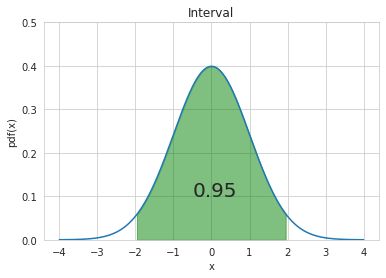

In [ ]:
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Interval")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(a,b,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='g')
ax.text(-0.5,0.1,"0.95", fontsize=20)
plt.show()

## Standard normal distribution
When 𝜇=0 and variance=1, it is called the standard normal distribution. The above probability function is simplified to:

$$
\Phi(x) = \frac{1}{\sqrt{ 2 \pi}}
e^{ - \frac{-x^2} {2} }
$$

## Standardized normal variable
To standardize a random variable into the standardized normal variable 𝑍∼𝑁(0,1) we use the transformation:

$$
Z = \frac{x - \mu}{\sigma}
$$

The standardized value Z tells how many standard deviations below or above the mean the original value is.

## Finding the standard normal value
For example, to find the standardized value for 𝑥=1 when a mean of 2 and a standard deviation of 3.

$$X \sim N(2,3^{2})$$

$$
Z = \frac{1 - 2}{3}
$$

We can use norm.cdf to find the probability and use `norm.ppf` with 𝜇=0,𝜎=1 to find the standardized value.


In [ ]:
norm.cdf(1, loc=2, scale=3)

0.36944134018176367

<a name="z-proba"></a>

## Z-próba <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

A Z-próba az eloszlás, a minta átlagát teszteli úgy. Ahhoz, hogy a Z-próba működését pontosan megértsük ismernük kell a Normális eloszlást és annak számos tulajdonságát. Amit a Z-próba során felhasználunk az az, hogy a Normális eloszlás sűrűség függvénye jól ismert és ki tudjuk számítani a függvény alatti területet.

A központi határeloszlás tétele miatt sok statisztika közel normális eloszlást követ nagy mintaelemszám esetében. Ha a populációs szóródás nem ismert (és ezért a mintából kell becsülnünk) vagy a mintaelemszám nem elég nagy (n < 30), akkor Student féle t-próbát kell alkalmaznunk.

### Hogyan végezzük el a Z-próbát?

Ha van egy T statisztikánk amely közel normális eloszlású, akkor:

1. Becsüljük meg T teszt statisztika várható értékét ($\mu$) és szórását ($S$)
2. Határozzuk meg, hogy egyoldali, vagy kétoldali próbát fogunk alkalmazni.

Ha a hipotézisünk:<br>
$H_0: \mu \geq \mu_0$ és az alternatív hipotézisünk $H_1: \mu < \mu_0$ akkor jobb oldali,<br>
$H_0: \mu \leq \mu_0$ és az alternatív hipotézisünk $H_1: \mu > \mu_0$ akkor bal oldali,<br>
$H_0: \mu = \mu_0$ és az alternatív hipotézisünk $H_1: \mu \neq \mu_0$ akkor kétoldali oldali próbát alkalmazunk

3. Határozzuk meg az átlag standard hibáját
$$SE = \frac{\sigma}{\sqrt{n}} = \frac{12}{\sqrt{55}} = \frac{12}{7.42} = 1.62$$
<br>
$\sigma$ a populáció szórása, $n$ a minta nagysága

4. Számoljuk ki a Z-értéket amely $Z = \frac{\overline{X}-\mu_o}{S}$

$$Z = \frac{\overline{X}-\mu}{SE} = \frac{96-100}{1.62} = -2.47$$
<br>

Fenti példában ismert a populáció átlaga $\mu = 100$ és szórása $\sigma = 12$ és arra kerestük a választ, <br>hogy egy $n = 55$ elemű mintában mért átlag $\overline{X} = 96$ és a populáció átlaga közötti különbség, milyen mértékben adódhat véletlenül.

A Z értéke azt mondja meg, hogy a Normál eloszlásból számolva mekkora annak a valószínűsége, hogy ilyen mintaátlagot kaptunk adott mintaelemszám mellett egy adott populációból. A standard normál eloszlás $N(0,1)$ függvény $-2.47$ alatti területe adja meg ennek a valószínűségét, amely közel $0.014$

Másféleképpen $1-0.014$ annak a valószínűsége, hogy egy $n=55$ elemű mintában $\overline{X} = 96$ mintaátlagot kapnánk ha egy $N(100,12)$ eloszlású populációból veszünk mintát.

Tehát 98.6% bizonyossággal mondhatjuk, hogy elutasítjuk a null hipotézist $H_0: \mu = \mu_0$ miszerint a véletlen mintavétellel ilyen a mintában megfigyelt átlagot kapnánk a populációból.

A <a href="https://en.wikipedia.org/wiki/Standard_normal_table">táblázatból</a> olvasható le, hogy adott $Z$ értékhez, milyen valószínűség tartozik.






















((array([-1.8241636 , -1.38768012, -1.11829229, -0.91222575, -0.73908135,
         -0.5857176 , -0.44506467, -0.31273668, -0.18568928, -0.06158146,
          0.06158146,  0.18568928,  0.31273668,  0.44506467,  0.5857176 ,
          0.73908135,  0.91222575,  1.11829229,  1.38768012,  1.8241636 ]),
  array([146., 151., 155., 155., 156., 156., 158., 161., 161., 167., 168.,
         168., 175., 176., 176., 176., 176., 181., 185., 186.])),
 (12.186962879863213, 166.65, 0.9797804715359358))

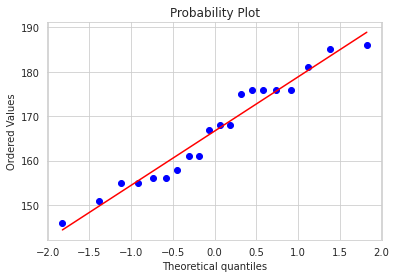

In [ ]:
stats.probplot(df['male'], plot = plt)

In [ ]:
stats.shapiro(df['male'])

# {H0:} normális eloszlásból származik a minta? Vagy, hogy a populáció amiből a minta származik lehet-e normális eloszlású adott minta mellett.

(0.9467417001724243, 0.3203215003013611)

Test value 0.956822, p-value 0.000009


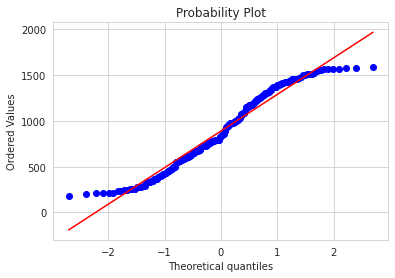

In [ ]:
np.random.seed(0)

uniformRnd = np.random.uniform(low = 1600, high = 180, size = 200)

uniformInts = np.round(uniformRnd)

test_value, p_value = stats.shapiro(uniformInts)

print('Test value {:02f}, p-value {:02f}'.format(test_value, p_value))

stats.probplot(uniformInts, plot = plt)
plt.show()

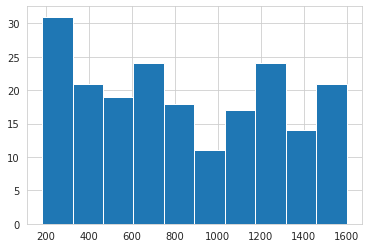

In [ ]:
plt.hist(uniformInts)
plt.show()

## Correlation

In [ ]:
# Loading built-in Datasets:
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.describe(percentiles = [0.5])

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
50%,5.800000,3.000000,4.350000,1.300000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.describe(include=['O'])

,species
count,150
unique,3
top,virginica
freq,50


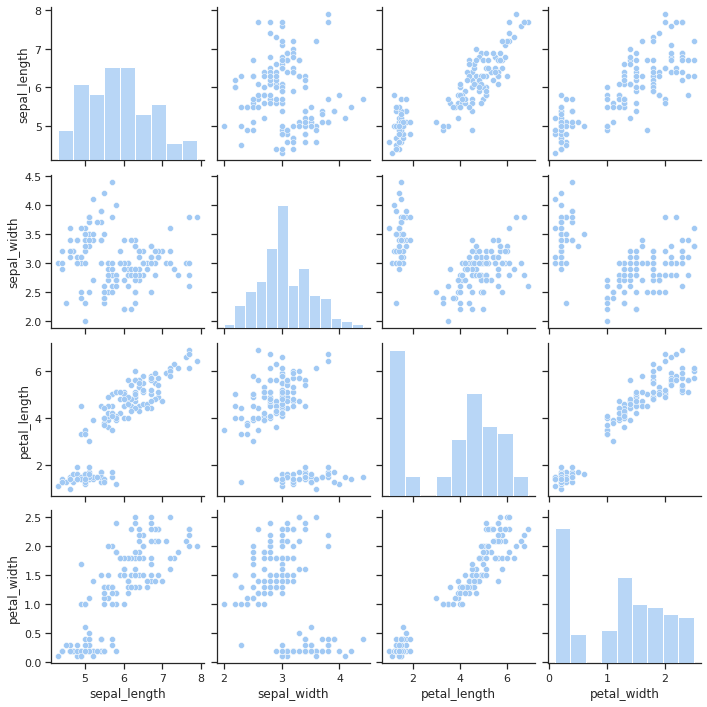

In [ ]:
sns.pairplot(iris)

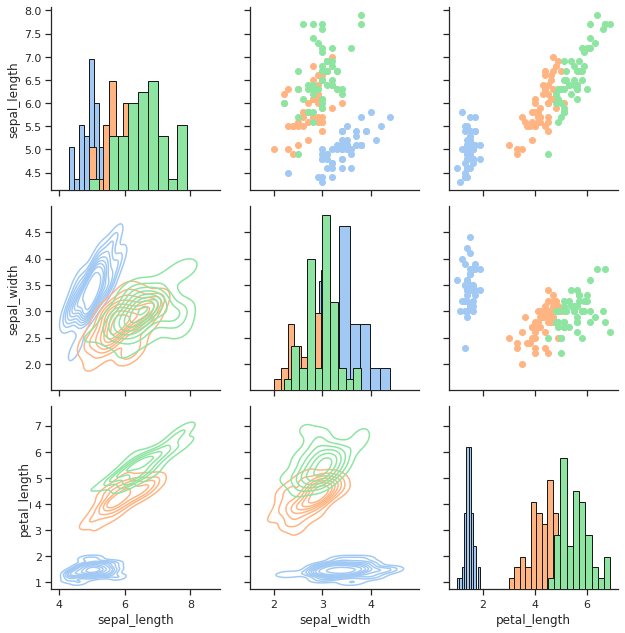

In [ ]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data = iris,
                    vars = ['sepal_length', 'sepal_width', 'petal_length'],
                    hue = 'species',
                    height = 3)

# Map a scatter plot to the upper triangle
grid = grid.map_upper(plt.scatter)

# Map a histogram to the diagonal
grid = grid.map_diag(plt.hist, bins = 10, 
                     edgecolor = 'k')
# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot)

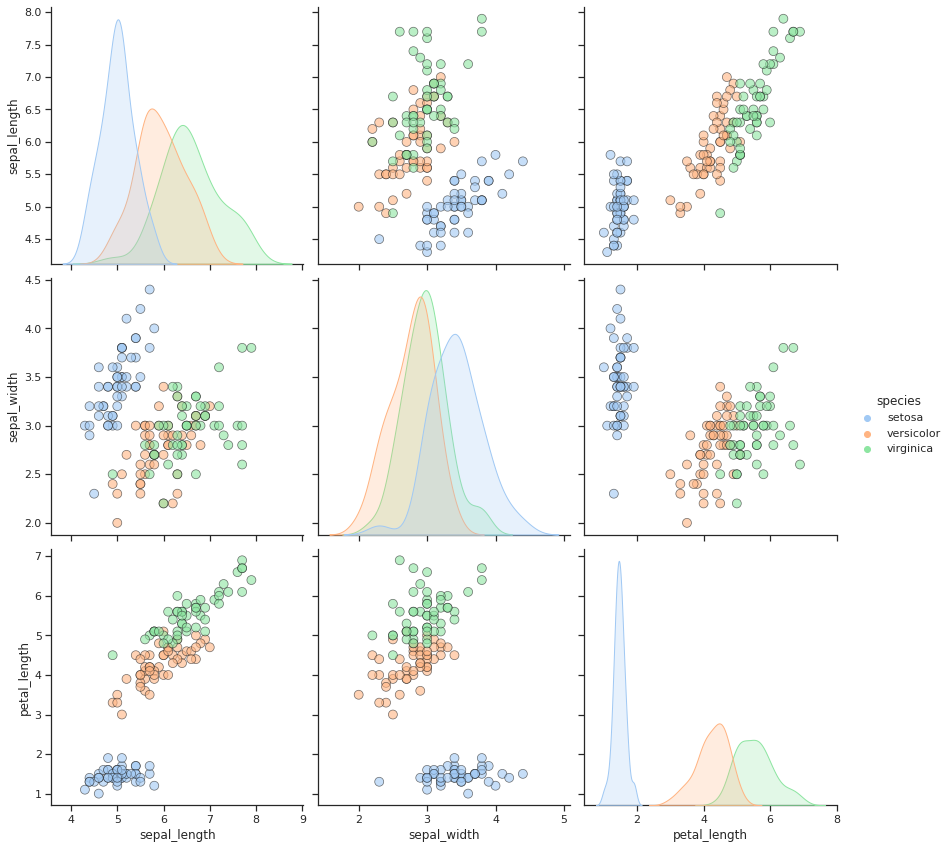

In [ ]:
# Plot az egyes növény fajtánként
sns.pairplot(data = iris, 
             vars = ['sepal_length', 'sepal_width', 'petal_length'], 
             hue = 'species', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)


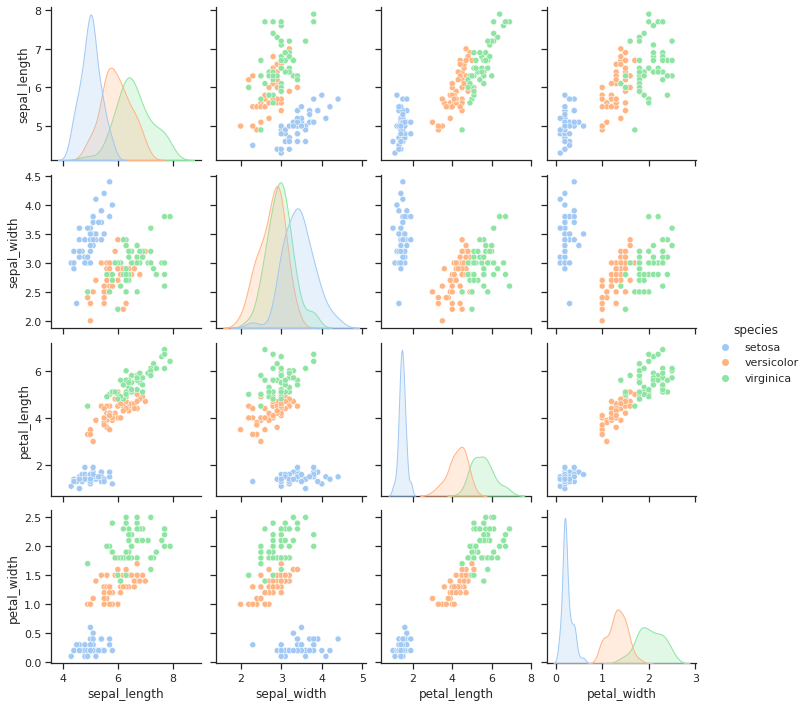

In [ ]:

sns.pairplot(iris, hue="species")


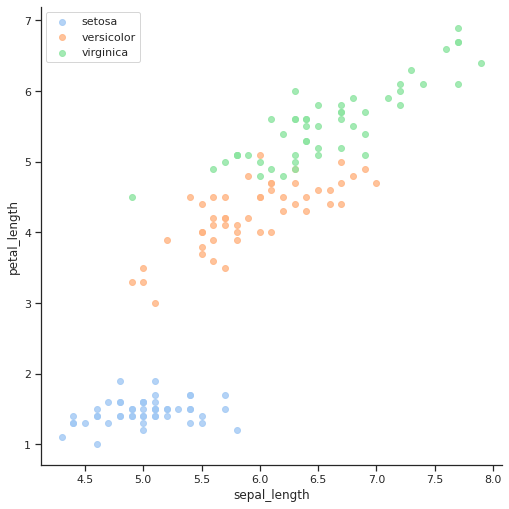

In [ ]:

sns.lmplot(x="sepal_length",
           y="petal_length",
           data=iris,
           hue="species", fit_reg=False, legend=False, height = 7)

plt.legend()
plt.show()


In [ ]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [ ]:
stats.pearsonr(iris['petal_width'], iris['petal_length'])

(0.9628654314027961, 4.6750039073275495e-86)

In [ ]:
# A {H0:} null hipotézisünk, hogy a két változó között nincs korreláció

corr, p_value = stats.pearsonr(iris['petal_width'], iris['petal_length'])

print('Pearson\'s correlation = {:.8}'.format(corr))
print('p_value = {:.8f}'.format(p_value))

# Annak a valószínűsége, hogy a két változó korrelálatlan kissebb mint 0.05

Pearson's correlation = 0.96286543
p_value = 0.00000000


In [ ]:
# A {H0:} null hipotézisünk, hogy a két változó között nincs korreláció

corr, p_value = stats.pearsonr(iris['petal_width'], iris['sepal_width'])

print('Pearson\'s correlation = {:.8}'.format(corr))
print('\033[1mp_value = {:.8f} \033[0m'.format(p_value))

# Annak a valószínűsége, hogy a két változó korrelálatlan kissebb mint 0.05

Pearson's correlation = -0.36612593
p_value = 0.00000407 


In [ ]:
# A {H0:} null hipotézisünk, hogy a két változó között nincs korreláció

corr, p_value = stats.pearsonr(iris['sepal_length'], iris['sepal_width'])

print('Pearson\'s correlation = {:.8}'.format(corr))
print('p_value = {:.8f}'.format(p_value))

# Annak a valószínűsége, hogy a két változó korrelálatlan nagyobb mint 0.05

Pearson's correlation = -0.11756978
p_value = 0.15189826


## Az egyes változók eloszlása, átlaga, szóródása csoportonként

In [ ]:
petal = iris.loc[:,['petal_length', 'petal_width', 'species']]

In [ ]:
petal

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


In [ ]:
petal.mean()

petal_length    3.758000
petal_width     1.199333
dtype: float64

In [ ]:
petal.groupby('species')['petal_length'].mean()

species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

In [ ]:
petal.groupby('species')['petal_length'].var()

species
setosa        0.030159
versicolor    0.220816
virginica     0.304588
Name: petal_length, dtype: float64

In [ ]:
petal.groupby('species')['petal_length'].std()

species
setosa        0.173664
versicolor    0.469911
virginica     0.551895
Name: petal_length, dtype: float64

In [ ]:
petal.groupby('species')['petal_length'].median()

species
setosa        1.50
versicolor    4.35
virginica     5.55
Name: petal_length, dtype: float64

In [ ]:
petal.groupby('species')['petal_length'].quantile()

species
setosa        1.50
versicolor    4.35
virginica     5.55
Name: petal_length, dtype: float64

In [ ]:
petal.groupby('species')['petal_length'].quantile(0.25)

species
setosa        1.4
versicolor    4.0
virginica     5.1
Name: petal_length, dtype: float64

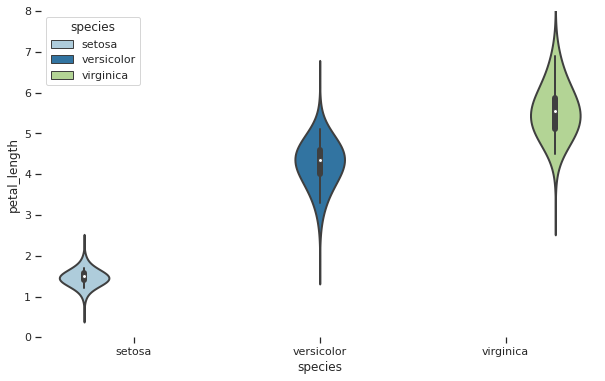

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=iris, x="species", y="petal_length", hue="species", palette="Paired", bw=.9, cut=4, linewidth=2)

# Finalize the figure
ax.set(ylim=(0, 8))
sns.despine(left=True, bottom=True)

# A színek beállításához segédlet https://seaborn.pydata.org/tutorial/color_palettes.html

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


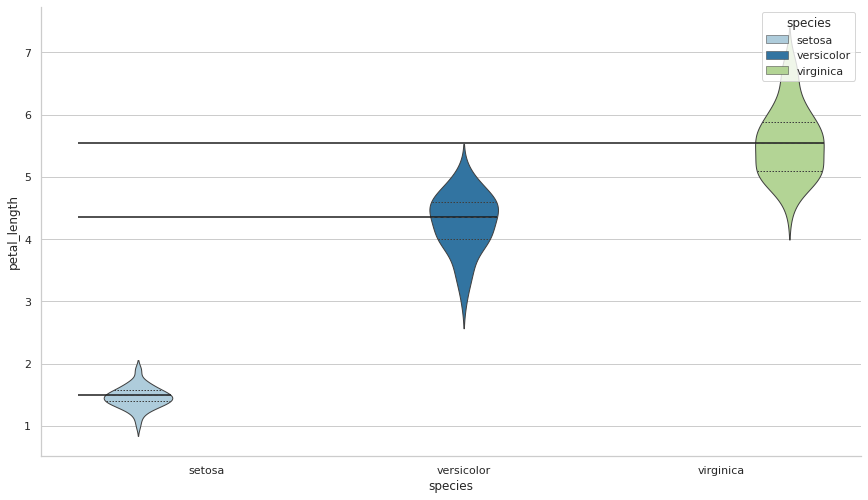

In [ ]:
m = petal.groupby('species')['petal_length'].median()
m.values

# Draw a nested violinplot and split the violins for easier comparison
sns.set_theme(style="whitegrid")

sns.violinplot(data=iris, x="species", y="petal_length", hue="species",
               split=False, inner="quart", linewidth=1,
               palette="Paired")
sns.despine(left=False)
plt.hlines(m[2], -0.5, 2.4)
plt.hlines(m[1], -0.5, 1.13)
plt.hlines(m[0], -0.5, -0.14)


In [ ]:
petal.cov()

,petal_length,petal_width
petal_length,3.116278,1.295609
petal_width,1.295609,0.581006


In [ ]:
petal['petal_length'].var()

3.1162778523489942

In [ ]:
petal['petal_width'].var()

0.5810062639821029

## Mi a hipotézis teszt?

Tegyük fel, hogy egy gyógyszerkutató cégnek dolgozunk és szeretnénk megvizsgálni, hogy egy adott gyógyszer csökkenti-e a vérnyomást. Ehhez egy olyan kísérletet tervezünk, ahol véletlenszerűen kiválasztunk embereket és két csoportra osztjuk őket. Az egyik csoport tagjai placebó gyógyszert kapnak, tehát olyan gyógyszert ami nem tartalmaz hatóanyagot. A másik csoport tagjai a hatóanyagot is tartalmazó gyógyszerből kapnak.

Mindkét csoportban minden egyes résztvevő vérnyomását megmérjük a gyógyszer bevétele előtt, és a gyógyszer bevételét követően egy 24 órával.

Ha a gyógyszerűnk valóban csökkenti a vérnyomást, akkor a mérési eredményeinkek azt kell mutatniuk, hogy abban a csoportban akik a hatóanyagot is tartalmazó gyógyszerből kaptak alacsonyabb az emberek vérnyomása, mint azoknál akik placebot kaptak.

Ebben az esetben vizsgálhatjuk azt, hogy a két csoporton belül a gyógyszer bevételét megelőző értékek és az utána mért értékek közötti különbség különbözik-e a két csoportban (kétmintás összetartozó t-próba). Vagy összehasonlíthatjuk a két csoportot csupán a gyógyszer bevételét követő mérések alapján is (kétmintás t-próba)

## T-próbát olyan esetekben alkalmazunk, amikor
két csoport közötti mért értékek átlagát akarjuk összehasonlítani, tehát a mért változónk mérési szintje folytonos. Ezt a próbát nem végezhetjük el olyan változón amelynek mérési szintje kategórikus (vagyis diszkrét értékeket tartalmaz)

## Mi is tulajdonképpen a változó mérési szintje?
Képzeljük el, hogy van egy változónk amiben a megfigyelési esetünk - ha az illető személy - nemét tároljuk. Ez lehet férfi vagy nő. Ez esetben a változónk **nominális**. Tegyük fel, hogy városok légszennyezettségi adatait szeretnénk összehasonlítani. A városok nevét tartalmazó változó szintén nominális. Igaz, hogy több mint két értéket vehet fel, de a városok közötti különbséget csupán a nevük alapján nem állíthatunk fel.

Kicsit más a helyzet akkor, ha nem a városok nevét, hanem azok közigazgatási besorolását vesszük figyelembe. {község, város, megyeszékhely, főváros}. Ezek az értékek szintén nominálisak, de van közöttük egy sorrend, ezért az ilyen változót **ordinális** mérési szintű változónak hívjuk.

Ha a városokat az ott élő lakosság száma alapján is megmérjük akkor már **magas mérési szintű** változóról beszélünk, hiszen a lakosság száma 0-tól bármeddig terjedhet. Ezt szokták **intervallum szintű** mérési változónak is nevezni, mert egyértelműen kimondható, hogy ha egy településen 1000 ember él és egy másik településen 2000 akkor az utóbbiban kétszer annyian élnek mint az elsőben.

Ugyanakkor fontos megértenünk azt is, hogy a lakosság száma csak disztkrét értéket vehet fel. Egy adott településen élők száma nem lehet 300.11.

Viszont, ha egy adott településeket az ott mért évi átlagos középhőmérséklettel jellemezzük, akkor az már **folytonos** mérési szintű változó. Lehet {-31.1 Celsius fok}, lehet {18.6 Celsios fok is}

## Attól függően, hogy egy változónak mi a mérési szintje, különböző típusú statisztikai teszteket alkalmazunk.
Azért fontos beszélnünk a változók mérési szintjéről, mert típusuktól függően más és más statisztikai teszteket tudunk végrehajtan rajtuk.

## Mi az a p-érték
A vérnyomáscsökkentő gyógyszer példáján keresztül hadd mutassam be a p-érétket. A p a probability (vagyis az angol valószínűség) szónak a rövidítése.


In [ ]:
np.random.seed(1)

# Generálok 20 esetet, N(170, 10):

mu, sigma = 170, 10
placeboRnd = np.random.normal(loc = mu, scale = sigma, size = 20)
placeboInts = np.round(placeboRnd)

# Generálok 20 esetet, N(160, 10):

mu, sigma = 160, 10
drugRnd = np.random.normal(loc = mu, scale = sigma, size = 20)
drugInts = np.round(drugRnd)

df = pd.DataFrame(placeboInts, columns = ['placebo'])
df['drug'] = drugInts


# Ennek előfeltétel, hogy a minták normális eloszlásúak, a populációs szórás nem ismert
# és mindkét populáció szórása azonos.

# Visszanyúlva a férfi, női testmagasság adatunkhoz, vizsgáljuk meg, hogy a két minta
# {H0:} átlaga egyenlő
# {H1:} átlaga nem egyenlő

stats.ttest_ind(df['placebo'], df['drug'], equal_var=True)

# A teszthez tartozó p érték 0.00596 ezért
# ha alpha = 0.05 vagyis 95%-os szignifikancia szintet választunk akkor el kell
# vetnünk a null hipotézist, hogy a két minta átlaga megegyezik.

Ttest_indResult(statistic=2.913231790824309, pvalue=0.005961862593206057)

## Igen, de ...

Ha a kisérletet többször is végrehajtuk, akkor előfordulhat, hogy az eltérés mértéke csupán a véletlennek tudható, és nem a gyógyszer valódi hatásának.

Ha például a fenti tesztet különböző mintákon többször is megismételjük, és megszámoljuk, hogy hány esetben vetettük el null hipotézist és hány esetben fogadtuk el, akkor látni fogjuk, hogy nem minden esetben fogadtuk el.

In [ ]:
p_less = 0
p_bigger = 0

for i in range(50):
  # np.random.seed(i*9)
  np.random.seed(i*10)
  mu, sigma = 170, 10

  placeboRnd = np.random.normal(loc = mu, scale = sigma, size = 20)
  placeboInts = np.round(placeboRnd)

  mu, sigma = 160, 10
  drugRnd = np.random.normal(loc = mu, scale = sigma, size = 20)
  drugInts = np.round(drugRnd)

  stat, p = stats.ttest_ind(placeboInts, drugInts, equal_var=True)

  # print(p)

  if(p > 0.05):
    p_bigger += 1
  elif(p < 0.05):
    p_less += 1

print('Number of p_bigger\t= {0}'.format(p_bigger))
print('Number of p_less  \t= {0}'.format(p_less))

Number of p_bigger	= 6
Number of p_less  	= 44


6 esetben a null hipotézist tehát, hogy a két minta átlaga megegyezik elfogadtuk. Hiszen a valószínűségi változóinknak egy olyan realizációja állt elő, amelyre a teszt azt mutatta ki, hogy a két minta átlaga megegyezik. Tehát ha 95 százalékos konfidencia intervallumot választun a teszthez, akkor 6 esetben azt láttuk, hogy tévesen fogadtuk el a null hipotézist, hiszen az adataink két olyan normális eloszlású populációból származnak, amelyek átlaga eltérő {170, 160} egyenként {10} szórással.

## Tehát..
Egy ilyen kísérlet után nem mondhatjuk teljes bizonyossággal, hogy a két populáció átlaga különbözik csupán azt, hogy **annak a valószínűsége, hogy a két populáció átlaga különbözik az adott minta alapján** ennyi és ennyi.
Ezt fejezi ki a p-érték.



## Valószínűségi változó

Most, hogy már tudjuk, hogy különböző mérési szintű változóink vannak érdemes lehet néhány szót említeni a ezeknek a valószínűségi változóknak az eloszlásáról is.

## Mi is az a valószínűségi változó eloszlása?

Anélkül túl messzire visszanyúlnék a kombinatorikához - pedig fogok - a valószínűségi változó eloszlását felfoghatjuk úgy is mint, hogy "mi annak a valószínűsége, hogy egy adott populációból, egy adott értéket fogok kiválasztani?". Erre a kérdésre az adott valószínűségi változó sűrüség függvényének ismeretében lehet válaszolni.

Például ha tudom, hogy a magyar felnőtt lakosság testmagassága $N \sim X(176, 10)$, akkor meg tudom mondani, hogyha véletlen szerűen kiválasztok egy embert ebből a sokaságból, akkor mekkora a valószínűsége annak, hogy a kiválasztott ember tesmagassága $\lt$ 170 centiméter.

Sőt tetszőleges testmagasságra meg tudom határozni, hogy mi annak a valószínűsége, hogy a kiválaszott személy testmagassága $\lt$ mint az adott érték. (De ehhez ismernünk kell a Normális eloszlást, lásd korábban)

## Mi az a minta, és mi a mintavételezés?

Korábbi példánál maradva egy embert választottunk ki a sokaságból és határoztam meg annak a valószínűségét, hogy az adott személy magassága $\lt$ mint egy adott érték. De mi van akkor, ha nem csak egy hanem több személyt is kiválasztok?

Tegyük fel, hogy véltlenszerűen kiválasztok 10 embert és megmérem a testmagasságukat. Veszem ennek az átlagát és a kísérletet megismétlem még egyszer. Ha elég sok ember közül választok véletlenszerűen akkor nem valószínű, hogy ugyan azt a 10 embert fogom ismét kiválasztani, tehát a második kísérletben kiválaszott emberek testmagassága más lesz. De veszem az ő tesmagasságuk átlagát, és a kísérletet még sokszor megismétlem.

Bármilyen következtetést, amit a minta adataiból le tudunk vonni, azt csak valamilyen valószínűséggel fogjuk tudni a populációra igaznak tekinteni.
Legyen akármilyen egyszerű a kutatói kérdésünk. Lehet, hogy csak annyit szeretnénk tudni, hogy van-e különbség a férfiak és a nők testmagassága között, de ezeket a kérdéseket a populációra szeretnénk vonatkoztatn.

A populációból választunk egy mintát. Az mintába eső elemeket tulajdonságait fogjuk megménni. A minta tulajdonságaiból fogunk visszakövetkeztetni a populáció tulajdonságaira. Ezért fontos, hogy a minta jól reprezentálja a populációt.

## A véletlen mintavétel
Hogyan lehet elérni, hogy a minta a lehető legjobban reprezentálja a teljes populációt. A minta kiválasztásakor törekedni kell arra, hogy a **populáció minden tagjának egyforma esélye legyen a mintába való bekerülésre.**. Ez a kérdés részben a kutatás tervezés témakörébe tartozik. De röviden annyi elmondható, hogyha egy populációra vonatkozólag (mondjuk a felnőtt Magyar lakosságra) vonatkozólag szeretnék valamilyen következtetést levonni a mintából, akkor értelemszerűen ebből a populációból kell véletlenszerűen kiválasztanom a megfigyelési eseteket.

Ha viszont egy olyan kutatást tervezek amelyeben valamilyen gyógyszer hatását szeretném vizsgálni akkor, hogy az esetleges véletlen szerű hatásokat kiszűrjem, a kiválasztott egyedeket is véletlenszerűen kell két csoportbó sorolni.

Az egész kutást és annak eredményeit **torzíthatja**, ha nem vesszük figyelembe ezeket a hatásokat. Bármilyen mintavételen alapuló kísérletet elképzelhetűnk, de az egyszerűség kedvéért tegyük fel, hogy férfiak átlagos tesmagasságára vagyunk kívánsiak a populációban. Ezért mintát veszünk, mondjuk a Magyar Kosárlabda válogatot tagjaiból. Természetesen a kosárlabdázók átlagos tesmagassága nagyobb az átlagos felnőtt férfiakénál ezért ez a minta nem jól fogja reprezentálni a magyar férfi felnőtt lakosságot.

Úgyan így, ha egy kisérlet elvégzése előtt, nem **randomizáljuk** (vagyis osztjuk az eseteket véletlenszerűen egyik vagy másik csoportba) a részteveőket, akkor előfordulhat, hogy egyik csoportba csak férfiak, másik csoporba csak nők fognak kerülni és a nemek közötti különbségek hatással lehetnek a kísérletünk eredményére.

Ha mégis ilyen - a mintavételnél előforduló - hibát vétünk akkor ezt a jelenséget hívjuk **szisztematikus torzításnak**.

Korlátozott mintavétel esetén pedig át kell gondolni, hogy mi az a populáció amelyre következtetünk.

## A mintában látható eredmények mennyire általánosíthatóak
Hogyan **becsüljük** meg azt, hogy a **minta** mennyire reprezentálja jól a populációat amelyre a **becslésemet** következtetésem levonom. A **statisztikai póbák** alapján becsüljük meg azt, hogy amit tapasztaltunk a mintában, az érvényes lesz a populációban is.

Például igaz-e, hogy a férfiak és a nők testmagassága között különbség van?
Ha a mintában látunk a férfiak és nők testmagassága között különbséget, akkor statisztikai próbákkal fogom eldönteni, hogy ez a különbség mennyire valószínű, hogy a poupulációban is jelen van.

Tehát a következtető statisztikák nem a hatás, jelenség mértékét fogják becsülni, hanem annak a valószínűségét fogja megadni, hogy **elsőfajú hibát** követünk el. Vagyis a mintából arra következtetek, hogy a poulációban is jelen van a hatás, jelenség, de valójában nincs.

Ezeknek a statisztikai próbáknak az eredménye fogja megadni, hogy mennyi annak a **valószínűsége**, hogy a mintában látható különbség valójában a véletlen mintavételből eredő jelenség, vagy véletlen együttállás következménye. Ha ennek annak a valószínűsége kics, hogy az eltérés csupán a véletlen mintavételből ered, akkor elfogadjuk, hogy a mintában tapasztalt eltérés, vagy jelenség a populációban is jelen van.

## A minta nagysága

 - minnél jobban lefedi a minta a populációt annál, annál valószínűbb, hogy pontosan reprezentálja a populációt, ezért annál kisebb a valószínűsége annak, hogy a mintában megfigyelt jelenség a csupán a véletlen mintavételből eredő véletlen folytán keletkezni.

n = 3 és a mintában csak férfiak vannak, akkor ha 50-50% a populációban a fériak és a nők aránya, akkor $p(k=3) = 0.5*0.5*0.5 = 0.125 (12.5\%)$ tehát 100-ból körülbelül 12.5 esetben előfordulhat az, hogy 3 férfit találunk a mintában holott a populációban a férifak-nők aránya 50-50%.
Ezért ilyen mintaelemszám melett igen kis valószínűséggel mondhatjuk, hogy a mintában megfigyelt jelenség a populációban is érvenyes lenne.

n = 10 elemű minta esetén annak a valószínűsége, hogy véletlen mintavétellen egyetlen nő sem lesz a mintában $0.5^{10} = 0.0009765625$

Tehát a mintámat reprezentatív véletlen mintavétellel vettem a populációból ahol a férfiak és nők aránya, 50-50 százalék, akkor $p(k=0) = 0.0009765625$ a valószínűsége annak, hogy egyetlen nő sem kerül a mintába.


$P(E)   = {n \choose k} p^k (1-p)^{ n-k}$ ahol ${n \choose k} = \frac{n!}{k! * (n - k)!}$

In [ ]:
import math

def binomial_p(n, k, p):

  c = math.factorial(n) / (math.factorial(k) * math.factorial((n-k)))

  return (c)*p**k*(1-p)**(n-k)


binomial_p(10, 0, 0.5)


0.0009765625

<a name="mintak_atlaga"></a>

> [vissza a tartalomjegyzékhez](#tartalom)<br>
> [vissza az u-próbára](#u-proba)<br>

## Nézzük meg, hogy milyen hatással van a minta nagysága a mintában mérhető étrékekere.

Genereáltam egy $N(176,10)$, n=9 millió 700 ezer 'populációt' amelyből 100 szor mintát veszünk és minden egyes mintában megérmjük az átlagot. Az így keletetkezett 100 elemű adatsorban is megmérem az átlagot és a szórást, majd grafikusan is megjelenítem. Azt szeretném ábráhozolni, hogy minnél kisebb a minta elemszáma annál kevésbé képes az átlag kiegyenlíten a mintában megfigyelhető különbségeket.

In [ ]:
import numpy as np

In [ ]:
population_height = np.random.normal(176, 10, 9700000)

mean = population_height.mean()

stdev = population_height.std()

In [ ]:
np.random.seed(1)

def take_samples(sample_size):

  samples_mean = np.arange(0, 100, 1, dtype='float64')

  counter = 0
  for i in samples_mean:
    sample = 0.0
    for j in range(sample_size):
      rnd = np.random.randint(0, 9700000)
      sample = sample +  population_height[rnd]
    s_mean = (sample / sample_size)
    samples_mean[counter] = s_mean
    counter += 1

  s_mean = samples_mean.mean()

  s_stdev = samples_mean.std()

  # print('population mean = {:.2f}'.format(mean))
  # print('population std  = {:.2f}'.format(stdev))
  print('n               = {:.0f}'.format(sample_size))
  print('samples mean    = {:.2f}'.format(s_mean))
  print('samples std     = {:.2f}'.format(s_stdev))
  print('----------------------------------------')

  return s_mean, s_stdev


In [ ]:

s_mean3, s_stdev3 = take_samples(sample_size = 3)
s_mean5, s_stdev5 = take_samples(sample_size = 5)
s_mean7, s_stdev7 = take_samples(sample_size = 7)


n               = 3
samples mean    = 176.43
samples std     = 6.09
----------------------------------------
n               = 5
samples mean    = 175.95
samples std     = 4.58
----------------------------------------
n               = 7
samples mean    = 176.54
samples std     = 3.71
----------------------------------------


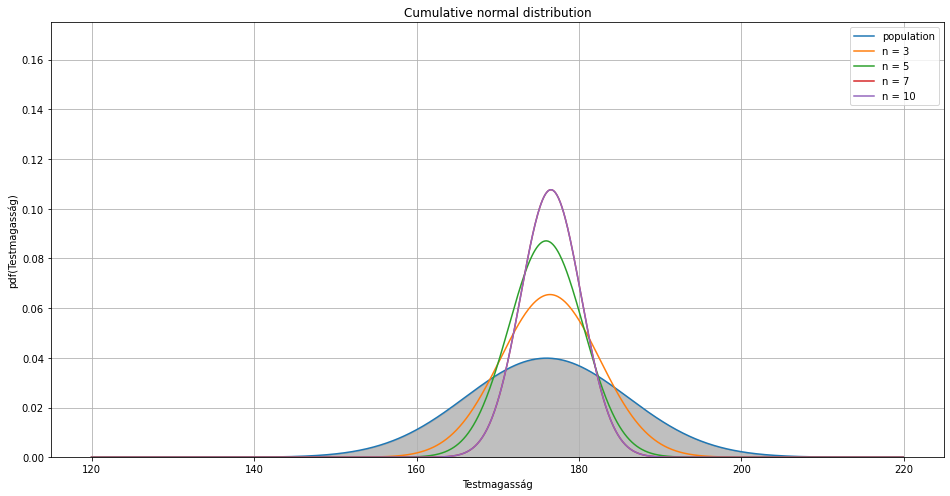

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

# A két eloszláshoz
x = np.arange(120, 220, 0.1)
pdf_population = norm.pdf(x , loc = mean, scale = stdev )

ax.plot(x, pdf_population, label = 'population')
ax.plot(x, norm.pdf(x , loc = s_mean3, scale = s_stdev3 ), label='n = 3')
ax.plot(x, norm.pdf(x , loc = s_mean5, scale = s_stdev5 ), label='n = 5')
ax.plot(x, norm.pdf(x , loc = s_mean7, scale = s_stdev7 ), label='n = 7')
ax.plot(x, norm.pdf(x , loc = s_mean7, scale = s_stdev7 ), label='n = 10')


ax.set_title("Cumulative normal distribution")
ax.set_xlabel('Testmagasság')
ax.set_ylabel('pdf(Testmagasság)')
ax.grid(True)
ax.legend()

# a kitöltéshez
px = np.arange(120, 220, 0.1)
ax.set_ylim(0, 0.175)
pdf_fill = norm.pdf(px, loc = mean, scale = stdev)
ax.fill_between(px, pdf_fill, alpha=0.5, color='gray')

plt.show()

Tehát a sokaságból vett **10 elemű minták** átlagának eloszlása sokkal keskenyebb mint a **teljes populációban** vett eloszlás. De ez logikus is ha belegondolunk, hogy minden egyes mintavétel alkalmával 10 elemet választottunk ki a sokaságból teljesen véletlen szerűen. Ezért elég valószínűtlet, hogy a mintába csak alacsony, vagy magas emberek kerüljenek. Sokkal valószínűbb, hogy kerültek bele ilyenek is olyanok is, de miután vettük az átlagukat az eredmény sokkal közelebb állt a **teljes sokaságban** mért tesmagasság átlagához.

In [ ]:
# Import pandas library
import pandas as pd
  
# initialize list of lists
data = [['tamás', 'férfi', 'mérnök', 'város', 170, 2210.5],
        ['ágnes', 'nő', 'orvos', 'nagyváros', 176, 0],
        ['juli', 'nő', 'jogász', 'nagyváros', 176, 1200.7],
        ['richárd', 'férfi', 'orvos', 'falu', 186, 110.5],
        ['attila', 'férfi', 'asztalos', 'város', 176, 50000.0],
        ['kata', 'nő', 'vállalkozó', 'város', 176, -32010.2],
        ['bence', 'férfi', 'portás', 'főváros', 176, 0],
        ['laci', 'férfi', 'mérnök', 'nagyváros', 176, 6040.56],
        ['zsófi', 'nő', 'vállalkozó', 'falu', 176, -34000.13],
        ['dávid', 'férfi', 'pék', 'város', 176, -21000.12],
        ['márta', 'nő', 'katona', 'város', 176, 65312.13],
        ['anna', 'nő', 'hentes', 'falu', 176, 15000.0],
        ['istván', 'férfi', 'eladó', 'nagyváros', 176, 6030.02],
        ['juli', 'nő', 'raktáros', 'főváros', 176, 7603.30],
        
        ]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Nominális', 'Dichotóm', 'Multinominális', 'Ordinális', 'Folytonos', 'Intervallum'])
  
# print dataframe.
df

,Nominális,Dichotóm,Multinominális,Ordinális,Folytonos,Intervallum
0,tamás,férfi,mérnök,város,170,2210.50
1,ágnes,nő,orvos,nagyváros,176,0.00
2,juli,nő,jogász,nagyváros,176,1200.70
3,richárd,férfi,orvos,falu,186,110.50
4,attila,férfi,asztalos,város,176,50000.00
5,kata,nő,vállalkozó,város,176,-32010.20
6,bence,férfi,portás,főváros,176,0.00
7,laci,férfi,mérnök,nagyváros,176,6040.56
8,zsófi,nő,vállalkozó,falu,176,-34000.13
9,dávid,férfi,pék,város,176,-21000.12


In [ ]:
# Diszkrét változók
# amelyek csak bizonyos pontokon vehethen fel értékeket
# Nominális  : Neve, Foglalkozása, Hajszíne
#              Olyan kategóriák amelyek nem rendezhetőek sorrendbe
# Dichotóm   : Neme, Van/Nincs, Igen/Nem,


# Ordinális  : Település, Iskolai végzettség, Iskolai osztályzat, Rangfokozat, gyakoriságok {soha, ritkán, gyakran, nagyon gyakran}
#              Nagyság szerint sorrendbe rakható, de nem értelmezhető a kategóriák
#              közötti különbség

# Skála típusú, az elelmek sorba rendezhetőek és az elemek közötti különbség, arány is kifejezhető
# Intervallum: Nincs természetes nulla pont. Hőmérséklet, Orvosi mutatók, Mesterségesen előállított mutatószámok
# Arányskála : Van természetes nulla pont. Életkor, Testmagasság, Vérnyomás, Pulzus szám, Jövedelem, Lakásnagyság


## A leíró statisztikák
Ezek a statisztikák a minta valamilyen tulajdonságát írják le:
- **átlag**: $\overline{x} = \frac{\sum x_i}{n}$

- **módusz**: A módusz egy sorozat leggyakrabban előforduló eleme.

- **medián**: A medián valamely értékekre vonatkoztatva az az érték, aminél a többinek a fele nagyobb és a fele kisebb (természetesen páros elemszám esetén a számtani közepet kell venni). Például egy népesség életkorának a mediánja az az életkor, aminél a népességnek pont a fele idősebb és pont a fele fiatalabb.


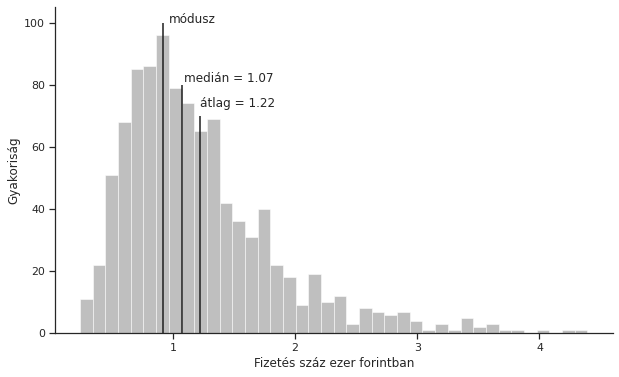

In [ ]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")
np.random.seed(0)

N = 1000
lognormal_values = np.random.lognormal(mean = 0.1, sigma = 0.5, size = N)


stddev = lognormal_values.std()
mean = lognormal_values.mean()
median = np.median(lognormal_values)

plt.figure(figsize=(10,6))
plt.hist(lognormal_values, 40, density = False, lw = 1, color = 'gray', alpha = 0.5)
plt.vlines(mean, 0, 70)
plt.vlines(median, 0, 80)
plt.vlines(0.92, 0, 100)
plt.text(1.09, 81, 'medián = ' + str(np.round(median, 2)), horizontalalignment='left')
plt.text(1.22, 73, 'átlag = ' + str(np.round(mean, 2)), horizontalalignment='left')
plt.text(1.16, 100, 'módusz', horizontalalignment='center')
plt.xlabel('Fizetés száz ezer forintban')
plt.ylabel('Gyakoriság')
sns.despine(left=False)

plt.show()


## A variancia és a szóródás

A variancia az átlagtól való négyzetes eltérés átlaga:
$\sigma^2 = \sum_{i=1}^{n} \frac{(x_i-\mu)^2}{n}$

Az átlagtól való átlagos eltérés:
$\sigma = \sqrt{\sum_{i=1}^{n} \frac{(x_i-\mu)^2}{n}}$




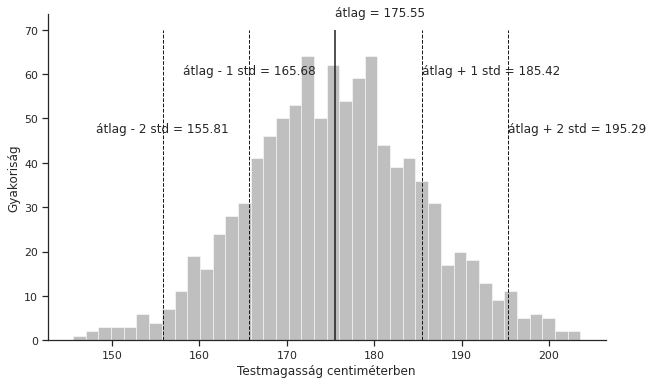

In [ ]:

sns.set_theme(style="ticks")
np.random.seed(0)

N = 1000
a = np.random.normal(loc = 176, scale = 10, size = N)

stddev = a.std()
mean = a.mean()

plt.figure(figsize=(10,6))
plt.hist(a, 40, density = False, lw = 1, color = 'gray', alpha = 0.5)
plt.vlines(mean, 0, 70)
plt.vlines(mean + stddev, 0, 70, linestyles = '--', lw = 1)
plt.vlines(mean - stddev, 0, 70, linestyles = '--', lw = 1)
plt.vlines(mean + 2*stddev, 0, 70, linestyles = '--', lw = 1)
plt.vlines(mean - 2*stddev, 0, 70, linestyles = '--', lw = 1)

plt.text(mean, 73, 'átlag = ' + str(np.round(mean, 2)), horizontalalignment='left')
plt.text(mean + stddev, 60, 'átlag + 1 std = ' + str(np.round(mean + stddev, 2)), horizontalalignment='left')
plt.text(mean + 2*stddev, 47, 'átlag + 2 std = ' + str(np.round(mean + 2*stddev, 2)), horizontalalignment='left')

plt.text(mean - stddev, 60, 'átlag - 1 std = ' + str(np.round(mean - stddev, 2)), horizontalalignment='center')
plt.text(mean - 2*stddev, 47, 'átlag - 2 std = ' + str(np.round(mean - 2*stddev, 2)), horizontalalignment='center')

plt.xlabel('Testmagasság centiméterben')
plt.ylabel('Gyakoriság')
sns.despine(left=False)

plt.show()

## Az empirikus szórásnégyzet számítására
szokták még használni a korrigált empirikus szórásnégyzetet is, ami nem más mint a variancia helyett $s^2 = \sum_{i=1}^{n} \frac{(x_i-\mu)^2}{n-1}$

A korrigált átlagtól való átlagos eltérés:
$s = \sqrt{\sum_{i=1}^{n} \frac{(x_i-\mu)^2}{n-1}}$

Kis mintaelemszám esetén ezért a varianca nagyobb lesz mint a tényleges populációban megfigyelhető variance, de nagy elemszám esetén ez a különbéség eltűnik.

Nem arra vagyunk kíváncsiak hogy a minta elemszámok értékei milyen mértékben szóródnak a minta átlaga körül hanem, hogy milyen mértékben szóródnak a populáció átlag körül. A populáció átlagot azonban sajnos nem ismerjük, és abban sem lehetünk biztosak, hogy a minta átlag elég közel helyezkedik el hozzá. Mivel azonban a minta elemeiből számoljuk ki a mintaátlagok, abban biztosak lehetünk, hogy a minta elemei közelebb fognak elhelyezkedni a minta átlagához, mint ahogy a populáció átlagához teszik azt. Ezáltal amikor a varianciát és a szórást a minta átlagágának segítségével számoljuk valójában az értékek szóródását alulbecsüljük.

Ezt az alábecslést kívánjuk a fenti módon korrigálni.

A szabadságfok egy számítás során az egymástól független szabadon választható tagok száma.



In [ ]:
10/50 + (15/50)*2 + (20/50)*3 + (5/50)*4

2.4

## A várható érték és az átlag közötti analógia

A valószínűség számításból ismert a várható érték fogalma ami $E(X) = \sum{p_i * X_i}$ vagyis az összes elem előfordulásának valószínűsége és értéknek szorzatai. A statisztikai átlag $\mu = \frac{\sum{x_i}}{N}$.

$$\mu = \frac{10 * 1 + 15 * 2 + 20 * 3 + 5 * 4}{10 + 15 + 20 + 5} = 2.4$$

$$E(X) = \frac{10}{50}*1 + \frac{15}{50}*2 + \frac{20}{50}*3 + \frac{5}{50}*4 = 2.4$$

A statisztikai szórás

$$\sigma^2 = \sum_{i=1}^{n} \frac{(x_i-M)^2}{N} = E((X - E(X))^2) = E(X^2) - E^2(X)$$
<table>
  <tr>
    <td>
      $j$
    </td>
    <td>
      $D_j$
    </td>
    <td>
      $X_j$
    </td>
    <td>
      $P_j$
    </td>
    <td>
      $X^2$
    </td>
  </tr>
  
  <tr>
    <td>
      $1$
    </td>
    <td>
      $10$
    </td>
    <td>
      $1$
    </td>
    <td>
      $10/50$
    </td>
    <td>
      $1$
    </td>
  </tr>

  <tr>
    <td>
      $2$
    </td>
    <td>
      $15$
    </td>
    <td>
      $2$
    </td>
    <td>
      $15/50$
    </td>
    <td>
      $4$
    </td>
  </tr>

  <tr>
    <td>
      $3$
    </td>
    <td>
      $20$
    </td>
    <td>
      $3$
    </td>
    <td>
      $30/50$
    </td>
    <td>
      $9$
    </td>
  </tr>

  <tr>
    <td>
      $4$
    </td>
    <td>
      $5$
    </td>
    <td>
      $4$
    </td>
    <td>
      $5/50$
    </td>
    <td>
      $16$
    </td>
  </tr>
</table>


A statisztikai szórás:

$$ \sigma^2 = (10 * (1-2,4)^2 + 15 * (2-2,4)^2 + 20 * (3-2,4)^2 + 5 * (4-2,4)^2)/50 = 0.84 $$

$$ \sigma^2 = \frac{10 * (1-2,4)^2 + 15 * (2-2,4)^2 + 20 * (3-2,4)^2 + 5 * (4-2,4)^2}{50} = 0.84 $$

A valószínűség számítás alapján:

$$E(X^2) = \sum{p_i * X^2_i} = \frac{10}{50}*1 + \frac{15}{50}*4 + \frac{20}{50}*9 + \frac{5}{50}*16 = 6.6$$

$E(X^2)$ az értékek négyzetének várhatóértéke. Ebből kell kivonni a várható érték $E(X) = 2.4$ négyzetét $5.76$ tehát $E(X^2) - E^2(X) = 6.6 - 5.76 = 0.84$




## A normális eloszlás

Tegyük fel, hogy van egy populációm és mintát veszek belőle. Megmérem az adott eseteket és feljegyzem a minta átlagát. Majd ismét mintát veszek és megismétlem az a mérésket és ismét feljegyzem az átlagot. Ezt a folyamatott többször megismétlem. Az így kapott mintaátlagokat is egy histogram segítségével ábrázolom.



In [ ]:
np.random.seed(1)

population = np.random.normal(loc = 176, scale = 10, size = 9700000)

def take_samples(sample_size):

  samples_mean = np.arange(0, 20, 1, dtype='float64')

  counter = 0
  for i in samples_mean:
    sample = 0.0
    for j in range(sample_size):
      rnd = np.random.randint(0, 9700000)
      sample = sample +  population[rnd]
    s_mean = (sample / sample_size)
    samples_mean[counter] = s_mean
    counter += 1

  s_mean = samples_mean.mean()

  return s_mean


In [ ]:
tests = 10000

samples_average = np.arange(0, tests, 1, dtype = np.float64)

for i in range(tests):
  mean = take_samples(sample_size = 10)
  samples_average[i] = mean



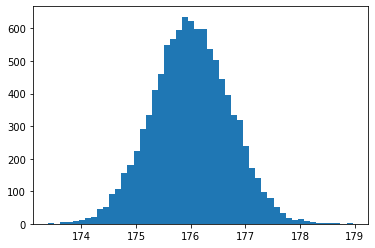

In [ ]:
plt.hist(samples_average, bins = 50)
plt.show()

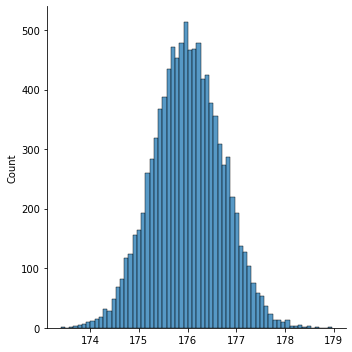

In [ ]:
sns.displot(samples_average, discrete=False)

## A minta átlagok standard hibája

A populációból vett minták átlagainak szórását jelenti.
Jelölése $S_{\overline{x}}$

Minnél nagyobbak a mintáknak az elemszámai annál kissebb lesz a standard error. Ezt már korábban bemutattam.

A populáció varianciája nem ismert.
Ezért a mintára vonatkoztatott varianciát osztjuk el a minta nagyságával és ez lesz a standard error


$${S_{\overline{x}}}^2 = \frac{S^2}{N} \to S_{\overline{x}} = \sqrt{\frac{S^2}{N}} = \frac{S^2}{\sqrt{N}}$$


Mi az amit a Standard Error megmutat a mintával kapcsolatban?
Az SE megadja azt, hogy mennyire bizonytalan az általunk mért minta átlaga.

Ha a SE kicsi akkor nem lehet reprezentatív a mintánk a populációra, hiszen egy következő mintavétel esetén egészen más mintátlagot kaphatok.

Az SE is skálafüggő, az adott változótól függ, hogy mekkora az értéke. Ezért nincs egyértelmű szabály arra, hogy mi számít nagy Standard Errornak.

A Relativ Standard Error az ${SE}/{\overline{x}}$

Fenti képletből következik, hogy minnél nagyobb a minta elemszáma annál kissebb lesz a Standard Error.



## A standardizálás (Z-score)

A populációban, ha ismert a populációs átlag és szórás, akkor:

$$z=\frac{x-\mu}{\sigma}$$

ahol
$\mu$ a populáció átlaga,
$\sigma$ a populáció standard eltérése.


Egyébként a minta átlagga és a minta standard eltérésével számolunk:

$$z=\frac{\overline{x}}{S}$$

ahol
$x$ a minta átlaga,
$\overline{x}$ a minta standard eltérése.




In [ ]:
x = np.array([2,3,4,2,3,4,5,3,2,1,1,3,4,3,2,1,3,4])

In [ ]:
x.std(ddof=1)

1.1659661762602749

In [ ]:
(x-x.mean())/x.std(ddof=1)

array([-0.66706719,  0.19059062,  1.04824844, -0.66706719,  0.19059062,
        1.04824844,  1.90590625,  0.19059062, -0.66706719, -1.524725  ,
       -1.524725  ,  0.19059062,  1.04824844,  0.19059062, -0.66706719,
       -1.524725  ,  0.19059062,  1.04824844])

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

stats.zscore(x, ddof=1)

array([-0.66706719,  0.19059062,  1.04824844, -0.66706719,  0.19059062,
        1.04824844,  1.90590625,  0.19059062, -0.66706719, -1.524725  ,
       -1.524725  ,  0.19059062,  1.04824844,  0.19059062, -0.66706719,
       -1.524725  ,  0.19059062,  1.04824844])

In [ ]:
0.5**6

0.015625

In [ ]:
1/20

0.05

$P(E)   = {n \choose k} p^k (1-p)^{ n-k}$

In [ ]:
import math

def binomial_p(n, k, p):

  c = math.factorial(n) / (math.factorial(k) * math.factorial((n-k)))

  return (c)*p**k*(1-p)**(n-k)


In [ ]:
binomial_p(6, 0, 0.5)

0.015625

## Hipotézis vizsgálatoknál és statisztikia próbáknál

A $p$ értéke azt mondja meg, hogy mekkora a valószínűsége annak, hogy eltérések csupán véletlenszerűek. Ha ez a $p$ érték < 0.05, akkor azt úgy értelmezzük, hogy csupán igen kicsi a valószínűsége annak, hogy az eltérések a véletlen miatt megfigyelhetőek.

Ha valamilyen következtetést szeretnénk levonni a mintából a populációra nézve és a mintavételünk véletlen mintavétel volt, akkor a $p$ értékét felfohatjuk úgy is, minthogy mi a valószínűsége annak, hogy a mintában megfigyelt jelenség nincs jelen a populációban.



## A következtető statisztika
foglalkozik azzal amikor eldöntjük azt, hogy a mintában látható különbségek, a minta tulajdonságai alapján, milyen valószínűséggel általánosíthatóak az egész populációra.



## Milyen eloszlások léteznek?

Számos. De, hogy a változó mérési szintjével párhuzamosan halladjunk vegyük most egy olyan változót amelynek az értéke két értéket vehet fel. Például ha egész Magyarország lakosságát veszem sokaságnak, akkor mi a valószínűsége annak, hogy egy véletlenszerűen kiválasztott ember éppen férfi?

A KSH adatai szerint 2021-ben ez az érték (0.475). Azért ennyi mert a lakosságban a férfiak aránya 47.5%.

## A konfidencia intervallumról

Az eredeti példánál maradva van 9700000 emberünk. Véletlenszerűen kiválasztunk belőlük 80-at.

A 80 fős mintában az emberek testmagasságának átlaga **FONTOS** a mintában mért átlag $\overline{x} = 170 cm$.

Felmerül a kérdés:
"Mi a valószínűsége annak, hogy az összes ember testmagassága is $170 cm$"

Valamiért mégsem így tesszük fel a kérdést hanem fordítva.

"Feltéve, hogy a mintában a testmagasság átlaga $170 cm$, mi a valószínűsége annak, hogy az összes ember testmagasságának az átlaga is ennyi."

És itt jön a csavar, hogy nem azt mondjuk, hogy pontosan ennyi, hanem hogy
ilyen vagy olyan valószínűségel ebbe az intervallumba esik.
Mondjuk $p(x = 170) = [95\% \mathrm{CI} 167.81 - 172.19]$.
Más szavakkal, 95% bizonyossági szint melett azt mondhatjuk, hogy a teljes sokaságban megfigyelhető átlag a minta alapján 167.81 cm és 172.19 cm között van.

Ez azt jelenti, hogy ha 100 szor elvégeznénk ugyan ezt a kisérletet (tehát, véletlenszerűen választanánk 80 embert) akkor az így végzett mérés alapján a teljes sokaságban mérhető átlag a 100 kisérletből 95 ször esne abba az intervallumba a becslés. 5 ször viszont nem.

Tehát lehetséges, hogy a teljes sokaság testmagasságának átlaga 167.81 - 172.19 között van. De teljes bizonyossággal nem állíthatjuk.

Tehát 20-ból 1-szer egy ilyen becslés intervalluma nem tartalmazná a tényleges populációs átlagot.

Erre megoldás lehet az, ha
 1. megnöveljük a mintaelemszámot
 2. megemeljük a konfidencia szintet [95-ről, 99-re, vagy akár 99.9-re] de ezzel megnő a konfidencia intervallumunk, vagyis a tól-ig terjedő tartomány is.


In [ ]:
n = 50      # a megfigyelések szám
x = 170     # a mina átlaga
std = 10    # a minta szórása
cl = 95     # a konfidencia intervallum

# ci = x +- Z*(std/sqrt(n))

# szóval a ci az átlag plusz Z * (std/sqrt(megfigyelések száma))

# a különböző z értékek
#
# 80% 1,283
# 90% 1,645
# 95% 1,960
# 99% 2,576
# 99.5% 2,807
# 99.9% 3,291

Z = 1.960
marginalis_hiba = Z * (std/math.sqrt(n))
ci_upper = x + Z * marginalis_hiba
ci_lower = x - Z * marginalis_hiba

print(ci_upper)
print(ci_lower)
print(marginalis_hiba)

175.4328428212125
164.5671571787875
2.771858582251266


Itt csak arra szeretnék kiétrni, hogy a marginális hiba és ezáltal a konfidencia intervallum függ a megfigyelések számától $(n)$ kiváncsi vagyok rá, hogy alakul ennek az értéke az $(n)$ függvényében, miközben sem az $(x)$ sem a $std$ értékét nem változtatom.

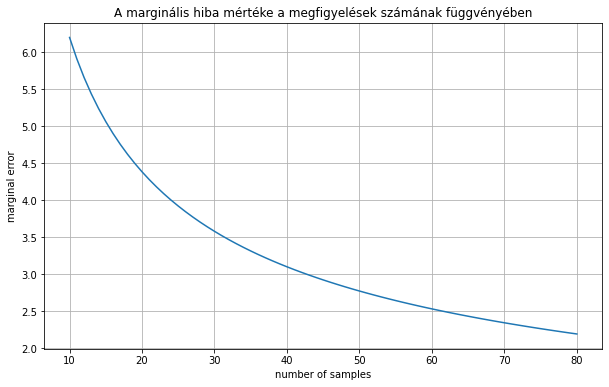

In [ ]:
start = 10; end = 80

tmp_x = np.linspace(start, end, (end-start+1))
tmp_y = np.zeros(end-start+1)

for i, n in enumerate(tmp_x, 0):
  marginalis_hiba = Z * (std/math.sqrt(n))
  tmp_y[i] = marginalis_hiba

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(tmp_x, tmp_y)
ax.set_title('A marginális hiba mértéke a megfigyelések számának függvényében')
ax.set_xlabel('number of samples')
ax.set_ylabel('marginal error')
ax.grid(True)

plt.show()

In [ ]:
# Tehát ha x = 170 és std = 10 akkor n=10-nél a hiba
print('error = {:.02f}'.format(tmp_y[0]))

# ha az n=80 akkor a hiba
print('error = {:.02f}'.format(tmp_y[-1]))

# ezért a 95%-os confidencia intervallum alsó határa
print('x {:.00f} [95% CI {:.02f} - {:.02f}]'.format(x, x - tmp_y[-1], x + tmp_y[-1]))


error = 6.20
error = 2.19
x 170 [95% CI 167.81 - 172.19]


$P(E)   = {n \choose k} p^k (1-p)^{ n-k}$

## Beépített adathalmazok

Egy rövid összeállítás arról, hogyan lehet különböző Python könyvtárak segítségével adatkhoz jutni. Az adatok beolvasása természetesen történhet fájlból.

### seaborn könyvtárból https://github.com/mwaskom/seaborn-data

```
import seaborn as sns

dots = sns.load_dataset("dots")
```

### pandas könyvtárból

```
import pandas as pd

iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

```



### statsmodels.api könyvtárból https://www.statsmodels.org/stable/datasets/index.html#datasets

```
import statsmodels.api as sm

iris = sm.datasets.get_rdataset('iris').data
```




### PyDataset könyvtárból https://github.com/iamaziz/PyDataset

```
from pydataset import data

iris = data('iris')
```



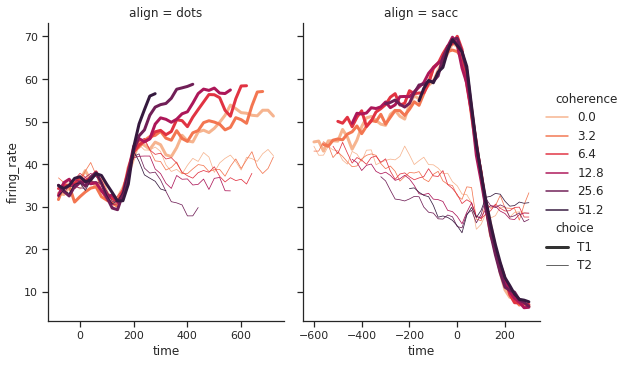

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

dots = sns.load_dataset("dots")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=dots,
    x="time", y="firing_rate",
    hue="coherence", size="choice", col="align",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

<a name="felhasznalt-irodalom"></a>

[tartalom](#tartalom)

<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

## Felhasznált irodalom és internetes cimek <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

Understanding the Normal Distribution (with Python)
<br>
https://towardsdatascience.com/understanding-the-normal-distribution-with-python-e70bb855b027


NumPy API Reference Guide
<br>
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html


Wikipedia 'Normal distribution'
<br>
https://en.wikipedia.org/wiki/Normal_distribution


Wikipedia 'Shapiro–Wilk test'
<br>
https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test


Seaborn API Reference Guide
<br>
https://seaborn.pydata.org/examples/pair_grid_with_kde.html


Wikipedia 'Covariance'
<br>
https://en.wikipedia.org/wiki/Covariance


Wikipedia 'Binomiális eloszlás'
<br>
https://hu.wikipedia.org/wiki/Binomi%C3%A1lis_eloszl%C3%A1s


Wikipedia 'Binomial distribution'
<br>
https://en.wikipedia.org/wiki/Binomial_distribution


Math AP®︎/College Statistics Confidence intervals Confidence intervals for proportions
<br>
https://www.khanacademy.org/math/ap-statistics/estimating-confidence-ap/one-sample-z-interval-proportion/v/conditions-for-valid-confidence-intervals


Wikipedia 'Confidence interval'
<br>
https://en.wikipedia.org/wiki/Confidence_interval


Wikipedia 'Standard score'
<br>
https://en.wikipedia.org/wiki/Standard_score


Wikipedia 'U-próba'
<br>
https://hu.wikipedia.org/wiki/Egymint%C3%A1s_u-pr%C3%B3ba


Wikipedia 'T-próba'
<br>
https://hu.wikipedia.org/wiki/Egymint%C3%A1s_t-pr%C3%B3ba


Statokos 'T-próba'
<br>
https://www.statokos.com/t-probak


Wikipedia 'Z-test'
<br>
https://en.wikipedia.org/wiki/Z-test

------------

[2]
P. R. Peebles Jr., “Central Limit Theorem” in “Probability, Random Variables and Random Signal Principles”, 4th ed., 2001, pp. 51, 51, 125.


[3]
Székely Mária - Barna Ildikó, "Túlélő készlet az SPSS-hez", 2008 Typotex, ISBN: 9789632790121

------------


An introduction to statistics
<br>
https://www.youtube.com/watch?v=kyjlxsLW1Is



Populáció és minta fogalma - Soltész-Várhegyi Klára
<br>
https://www.youtube.com/watch?v=4tYBtzNAEtY



```
     Istvan Pintye
     ---------------------------------------------------------
     MTA SZTAKI Computer and Automation Research Institute
                Hungarian Academy of Sciences,
     Laboratory of Parallel and Distributed Systems
     Postal    : P.O.Box 63. H-1518 Budapest, Hungary
     Location  : 1132 Budapest Victor Hugo u. 18-22. Hungary
     Phone/Fax : +36 1 329-78-64 (secretary)
     Mobile    : +36 30 822-5188
     E-mail    : pintye@sztaki.hu
     ---------------------------------------------------------
```



```
https://github.com/JoDeMiro
```